# Data Science - Project 2
Học viên thực hiện:
* Ms. Giang Phi Yến - yengp96@gmail.com
* Ms. Nguyễn Ngọc Khánh Linh - nnkl1517000@gmail.com

Ngày báo cáo: 23/6/2025 (trễ)

## 1. Business Understanding

### 1.1 Yêu cầu 1: Gợi ý công ty tương tự
* Dựa vào nội dung mô tả của các công ty trên ITviec
* Mục tiêu: Đề xuất các công ty tương tự để tìm đối thủ cạnh tranh, đối tác hoặc học hỏi

### 1.2 Yêu cầu 2: Dự đoán khả năng "Recommend"
* Dựa vào review của nhân viên/ứng viên
* Mục tiêu: Dự đoán một công ty có được đề xuất hay không


## 2. Data Understanding / Acquire

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity

from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


In [ ]:
%cd '/content/gdrive/MyDrive/DL07_Data Science Thesis/DL07_K304_GiangPhiYen_NguyenNgocKhanhLinh/Week2'

/content/gdrive/MyDrive/DL07_Data Science Thesis/DL07_K304_GiangPhiYen_NguyenNgocKhanhLinh/Week2


In [ ]:
# Load data - Colab
df_companies = pd.read_excel('/content/gdrive/MyDrive/DL07_Data Science Thesis/DL07_K304_GiangPhiYen_NguyenNgocKhanhLinh/Week2/data/Overview_Companies.xlsx')
df_reviews = pd.read_excel('/content/gdrive/MyDrive/DL07_Data Science Thesis/DL07_K304_GiangPhiYen_NguyenNgocKhanhLinh/Week2/data/Reviews.xlsx')

Sau khi kiểm tra dữ liệu thì tụi em nhận thấy Overview_Reviews là tổng hợp từ file Reviews nên tụi em quyết định không sử dụng

In [ ]:
df_companies.head(3)

id        Company Name    Company Type                  Company industry  \
0   0  1BITLAB Technology  IT Outsourcing  Software Development Outsourcing   
1   1               1test      IT Product     IT Services and IT Consulting   
2   2    52 Entertainment      IT Product                              Game   

     Company size      Country     Working days Overtime Policy  \
0  1-50 employees      Vietnam  Monday - Friday           No OT   
1  1-50 employees  South Korea  Monday - Friday           No OT   
2  1-50 employees       France  Monday - Friday           No OT   

                                    Company overview  \
0  1BITLAB Technology\nCông ty cổ phần công nghệ ...   
1  1test\nIs an innovative educational technology...   
2  A start-up of French and Vietnamese guys with ...   

                                      Our key skills  \
0                                                NaN   
1                                                NaN   
2  Our Key Skills\nJava\nGames\nQA QC\nC#\nUnity\...   

                        Why you'll love working here  \
0                                                NaN   
1                                                NaN   
2  Be your own boss\nA free lunch and a half day ...   

                                            Location  \
0  {'Ha Noi': ['81 Lê Đức Thọ, Nam Từ LIêm, Hà Nộ...   
1  {'Ho Chi Minh': ['Remote, District 1, Ho Chi M...   
2  {'Ho Chi Minh': ['Tầng 7, 23 Trần Cao Vân, Phư...   

                                                Href  
0  https://itviec.com/companies/1bitlab-technology\n  
1               https://itviec.com/companies/1test\n  
2    https://itviec.com/companies/52-entertainment\n

In [ ]:
df_companies.columns

Index(['id', 'Company Name', 'Company Type', 'Company industry',
       'Company size', 'Country', 'Working days', 'Overtime Policy',
       'Company overview', 'Our key skills', 'Why you'll love working here',
       'Location', 'Href'],
      dtype='object')

In [ ]:
df_companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478 entries, 0 to 477
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   id                            478 non-null    int64 
 1   Company Name                  478 non-null    object
 2   Company Type                  478 non-null    object
 3   Company industry              463 non-null    object
 4   Company size                  478 non-null    object
 5   Country                       478 non-null    object
 6   Working days                  476 non-null    object
 7   Overtime Policy               447 non-null    object
 8   Company overview              478 non-null    object
 9   Our key skills                321 non-null    object
 10  Why you'll love working here  379 non-null    object
 11  Location                      478 non-null    object
 12  Href                          478 non-null    object
dtypes: int64(1), object(

In [ ]:
# Loại bỏ các cột không quan trọng
df_companies = df_companies.drop(columns=['Location', 'Href'])

In [ ]:
df_reviews.head(3)

id Company Name       Cmt_day  \
0   4    Accenture    March 2025   
1   4    Accenture  January 2025   
2   4    Accenture  October 2023   

                                               Title  \
0  Môi trường thoải mái, ít áp lực, có thể làm vi...   
1                        Công ty trẻ trung năng động   
2               Môi trường làm việc thoải mái vui vẻ   

                                        What I liked  \
0  Môi trường thoải mái, ít áp lực, có thể làm vi...   
1  Cơ sở vật chất đẹp, công ty trẻ trung năng độn...   
2  Mội người thân thiện, giúp đỡ lẫn nhau. Chương...   

                         Suggestions for improvement  Rating  \
0  Cần đánh giá KPI khách quan và phân chia công ...       4   
1  Nên nghiên cứu lại range lương của thì trường....       4   
2  Do công ty làm outsourcing về mảng system nên ...       3   

   Salary & benefits  Training & learning  Management cares about me  \
0                  4                    4                          4   
1                  3                    4                          4   
2                  3                    3                          3   

   Culture & fun  Office & workspace Recommend?  
0              4                   4        Yes  
1              4                   5        Yes  
2              3                   3        Yes

In [ ]:
df_reviews.columns

Index(['id', 'Company Name', 'Cmt_day', 'Title', 'What I liked',
       'Suggestions for improvement', 'Rating', 'Salary & benefits',
       'Training & learning', 'Management cares about me', 'Culture & fun',
       'Office & workspace', 'Recommend?'],
      dtype='object')

In [ ]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8417 entries, 0 to 8416
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   id                           8417 non-null   int64 
 1   Company Name                 8417 non-null   object
 2   Cmt_day                      8417 non-null   object
 3   Title                        8417 non-null   object
 4   What I liked                 8416 non-null   object
 5   Suggestions for improvement  8412 non-null   object
 6   Rating                       8417 non-null   int64 
 7   Salary & benefits            8417 non-null   int64 
 8   Training & learning          8417 non-null   int64 
 9   Management cares about me    8417 non-null   int64 
 10  Culture & fun                8417 non-null   int64 
 11  Office & workspace           8417 non-null   int64 
 12  Recommend?                   8417 non-null   object
dtypes: int64(7), object(6)
memory usa

## 3. Data Preparation

### 3.1 Làm sạch văn bản

#### Làm sạch cơ bản
* Xử lý giá trị thiếu (null)
* Chuyển thành lower case
* Loại bỏ URL, email, ký tự đặc biệt
* Loại bỏ số
* Loại bỏ ký tự đặc biệt
* Loại bỏ khoảng trắng thừa và dấu xuống dòng (\n, \r, \t)
* Biến đổi emojicon, teencode, dấu câu, số, từ sai thành một chuỗi

In [ ]:
df_companies['Company overview'] = df_companies['Company overview'].fillna('')
df_companies['Our key skills'] = df_companies['Our key skills'].fillna('')
df_companies["Why you'll love working here"] = df_companies["Why you'll love working here"].fillna('')

In [ ]:
df_reviews['Title'] = df_reviews['Title'].fillna('')
df_reviews['What I liked'] = df_reviews['What I liked'].fillna('')
df_reviews['Suggestions for improvement'] = df_reviews['Suggestions for improvement'].fillna('')

In [ ]:
# !pip install --upgrade pip setuptools
# !pip install spellchecker
# !pip install demoji
# !pip install indexer==0.6.2

import string
import re
from spellchecker import SpellChecker
import demoji

In [ ]:
teencode_map = {
    "lol": "laughing out loud",
    "brb": "be right back",
    "omg": "oh my god",
    "g2g": "got to go",
    "u": "you",
    "r": "are",
    "ppl": "people",
    "w8": "wait",
    "gr8": "great",
    "l8r": "later",
    "b4": "before",
    "thx": "thanks",
    "np": "no problem",
    "pls": "please",
    "btw": "by the way",
    "imo": "in my opinion",
    "imho": "in my humble opinion",
    "afk": "away from keyboard",
    "asap": "as soon as possible",
    "fyi": "for your information",
    "idk": "i don't know",
    "irl": "in real life",
    "jk": "just kidding",
    "lmao": "laughing my ass off",
    "rofl": "rolling on floor laughing",
    "bff": "best friends forever",
    "cuz": "because",
    "msg": "message",
    "tmi": "too much information",
    "yolo": "you only live once",
    "aka": "also known as",
    "tl;dr": "too long didn't read",
    "rn": "right now",
    "nvm": "nevermind",
    "wbu": "what about you",
    "hbu": "how about you",
    "ttyl": "talk to you later",
    "fomo": "fear of missing out",
    "smh": "shaking my head",
    "ily": "i love you",
    "ily sm": "i love you so much",
    "bby": "baby",
    "xoxo": "hugs and kisses",
    "cu": "see you",
    "gg": "good game",
    "ez": "easy",
    "fr": "for real",
    "atm": "at the moment",
    "tbh": "to be honest",
    "ikr": "i know right",
    "gtg": "got to go",
    "wth": "what the hell",
    "wtf": "what the fuck",
    "omw": "on my way",
    "irl": "in real life",
    "rn": "right now",
    "sry": "sorry",
    "ty": "thank you",
    "ur": "your"
}

In [ ]:
spell = SpellChecker(language='en')

def normalize_text(text):
    if pd.isna(text) or text is None or str(text).strip() == '':
        return ''
    text = str(text).lower() # Convert to lowercase
    text = re.sub(r"http\S+|www\S+", ' ', text) # Remove URLs
    text = re.sub(r'\S*@\S*\s?', ' ', text)    # Remove Emails
    text = demoji.replace(text, ' ')            # Process Emojicon/Emoji

    # Process Teencode
    words = text.split()
    cleaned_words = []
    for word in words:
        if word in teencode_map:
            cleaned_words.append(teencode_map[word])
        else:
            cleaned_words.append(word)
    text = ' '.join(cleaned_words)

    text = re.sub(r'\d+', ' ', text)           # Remove numbers
    # Remove punctuation - using translate is generally efficient
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = re.sub(r'\s+', ' ', text).strip() # Remove extra whitespace and newlines

    # Correct spelling - Now using the pre-created 'spell' object
    words_to_correct = text.split()
    # Use a list comprehension for efficiency
    corrected_words = [spell.correction(word) if spell.correction(word) is not None else word for word in words_to_correct]
    text = ' '.join(corrected_words)

    return text

In [ ]:
# Apply to the cleaned columns
for col in ['Title', 'What I liked', 'Suggestions for improvement']:
    df_reviews[col] = df_reviews[col].apply(normalize_text)

In [ ]:
# Apply to the cleaned columns
for col in ['Company overview', 'Our key skills', "Why you'll love working here"]:
    df_companies[col] = df_companies[col].apply(normalize_text)

In [ ]:
df_reviews[['Title', 'What I liked', 'Suggestions for improvement']].head(3)

Title  \
0  Comfortable environment, low pressure, can wor...   
1                          Young and dynamic company   
2            Comfortable and fun working environment   

                                        What I liked  \
0  Comfortable environment, low pressure, can wor...   
1  Beautiful facilities, young and dynamic compan...   
2  Everyone is friendly and helpful. The Internsh...   

                         Suggestions for improvement  
0  It is necessary to evaluate KPIs objectively a...  
1  You should research the salary range of the ma...  
2  Because the company does outsourcing in the sy...

In [ ]:
df_companies[['Company overview', 'Our key skills', "Why you'll love working here"]].head(3)

Company overview  \
0  1BITLAB Technology\n1bitlab Technology Joint S...   
1  1test\nIs an innovative educational technology...   
2  A start-up of French and Vietnamese guys with ...   

                                      Our key skills  \
0                                                      
1                                                      
2  Our Key Skills\nJava\nGames\nQA QC\nC#\nUnity\...   

                        Why you'll love working here  
0                                                     
1                                                     
2  Be your own boss\nA free lunch and a half day ...

### 3.2. Chuyển ngôn ngữ qua tiếng anh

In [ ]:
# Setup translation library
# !pip install deep-translator

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 2.5 MB/s eta 0:00:00


In [ ]:
from deep_translator import GoogleTranslator

def translate_text(text, dest_lang='en', src_lang='vi'):
    if pd.isna(text) or text is None or str(text).strip() == '':
        return ''
    text_to_translate = str(text).strip()

    if not text_to_translate:
        return ''

    try:
        translated = GoogleTranslator(source=src_lang, target=dest_lang).translate(text=text_to_translate)
        return translated
    except Exception as e:
        print(f"Error translating '{text_to_translate}': {e}")
        return text_to_translate

In [ ]:
for col in ['Company overview', 'Our key skills', "Why you'll love working here"]:
    df_companies[col] = df_companies[col].apply(translate_text)

df_companies.head(3)

id        Company Name    Company Type                  Company industry  \
0  0.0  1BITLAB Technology  IT Outsourcing  Software Development Outsourcing   
1  1.0               1test      IT Product     IT Services and IT Consulting   
2  NaN    52 Entertainment      IT Product                              Game   

     Company size      Country     Working days Overtime Policy  \
0  1-50 employees      Vietnam  Monday - Friday           No OT   
1  1-50 employees  South Korea  Monday - Friday           No OT   
2  1-50 employees       France  Monday - Friday           No OT   

                                    Company overview  \
0  Blab Technology Blab Technology Joint Stock Co...   
1  Test is an innov Assignments and Practice Sess...   
2  A Startup of French and Vietnamese Guys with P...   

                                  Our key skills  \
0                                                  
1                                                  
2  Our Key Skills Java Games A AC C Unity Tester   

                        Why you'll love working here  
0                                                     
1                                                     
2  be your own boss a free lunch and a Half day o...

In [ ]:
for col in ['Title', 'What I liked', 'Suggestions for improvement']:
    df_reviews[col] = df_reviews[col].apply(translate_text)

df_reviews.head(3)

Error translating 'about work projects are mostly about bet c java pop python ai swift working on many different fields of business although there are many projects they use old technologyframeworks almost all outsourcing companies to japan are like that but there are still a few projects using brand new technology can go to japan to work but must have the ability and come in turn can also go to japan to attend conferences but also come in turn the company often changes project personnel so one person will definitely have to join at least projects can find other projects to apply for the entire company computers have not yet upgraded to office currently office which is extremely inconvenient when opening many files opening large files and especially not synchronizing with customers because customers have used much newer office like other companies this company still has a list of banned and unauthorized software so it is difficult to use offtheshelf software about salary and benefits p

id Company Name       Cmt_day  \
0   4    Accenture    March 2025   
1   4    Accenture  January 2025   
2   4    Accenture  October 2023   

                                               Title  \
0  Comfortable Environment Low Pressure Can Work ...   
1                          Young and Dynamic Company   
2            Comfortable and Fun Working Environment   

                                        What I liked  \
0  Comfortable Environment Pressure Can Work Hybr...   
1  Beautiful facilities Young and dynamic company...   
2  Everyone is friendly and help the Internship P...   

                         Suggestions for improvement  Rating  \
0  It is necessary to evaluate Kris Objectively a...       4   
1  You should research the salary range of the ma...       4   
2  because the company does outsourcing in the sy...       3   

   Salary & benefits  Training & learning  Management cares about me  \
0                  4                    4                          4   
1                  3                    4                          4   
2                  3                    3                          3   

   Culture & fun  Office & workspace Recommend?  
0              4                   4        Yes  
1              4                   5        Yes  
2              3                   3        Yes

In [ ]:
output_companies = '/content/gdrive/MyDrive/DL07_Data Science Thesis/DL07_K304_GiangPhiYen_NguyenNgocKhanhLinh/Week2/output/Overview_Companies_eng.xlsx'

print(f"\nSaving processed data to {output_companies}...")
df_companies.to_excel(output_companies, index=False)
print("Data saved successfully to Excel!")


Saving processed data to /content/gdrive/MyDrive/DL07_Data Science Thesis/DL07_K304_GiangPhiYen_NguyenNgocKhanhLinh/Week2/output/Overview_Companies_eng1.xlsx...
Data saved successfully to Excel!


In [ ]:
output_reviews = '/content/gdrive/MyDrive/DL07_Data Science Thesis/DL07_K304_GiangPhiYen_NguyenNgocKhanhLinh/Week2/output/Reviews_eng.xlsx'

print(f"\nSaving processed data to {output_reviews}...")
df_reviews.to_excel(output_reviews, index=False)
print("Data saved successfully to Excel!")


Saving processed data to /content/gdrive/MyDrive/DL07_Data Science Thesis/DL07_K304_GiangPhiYen_NguyenNgocKhanhLinh/Week2/output/Reviews_eng1.xlsx...
Data saved successfully to Excel!


### 3.3. Chuẩn hoá
* Tách từ (Tokenization)

* Loại bỏ Stop Words (Stopword Removal): from nltk.corpus import stopwords
* Đưa về dạng gốc (Stemming/Lemmatization) => giảm thiểu số lượng từ vựng và chuẩn hóa ngữ nghĩa: underthesea có hỗ trợ POS tagging

#### Tách từ (Tokenization)
Đưa về dạng gốc và loại bỏ stop words đều cần hoạt động trên từng từ riêng lẻ

In [ ]:
#!pip install underthesea
import underthesea

In [ ]:
columns_to_tokenize = ['Company overview', 'Our key skills', "Why you'll love working here"]

for col in columns_to_tokenize:
    df_companies[col] = df_companies[col].fillna('')

df_companies = df_companies.assign(
    company_overview_token = df_companies['Company overview'].apply(underthesea.word_tokenize),
    key_skills_token = df_companies['Our key skills'].apply(underthesea.word_tokenize),
    love_working_here_token = df_companies["Why you'll love working here"].apply(underthesea.word_tokenize)
)

NameError: name 'df_companies' is not defined

In [ ]:
df_companies[['Company overview', 'company_overview_token',
              'Our key skills', 'key_skills_token',
              "Why you'll love working here", 'love_working_here_token']].head(3)

Company overview  \
0  1BITLAB Technology\n1bitlab Technology Joint S...   
1  1test\nIs an innovative educational technology...   
2  A start-up of French and Vietnamese guys with ...   

                              company_overview_token  \
0  [1BITLAB, Technology, 1, bitlab, Technology, J...   
1  [1, test, Is an, innovative, educational, tech...   
2  [A start-up, of French, and Vietnamese, guys, ...   

                                      Our key skills  \
0                                                      
1                                                      
2  Our Key Skills\nJava\nGames\nQA QC\nC#\nUnity\...   

                                    key_skills_token  \
0                                                 []   
1                                                 []   
2  [Our, Key Skills, Java Games, QA QC, C, # Unit...   

                        Why you'll love working here  \
0                                                      
1                                                      
2  Be your own boss\nA free lunch and a half day ...   

                             love_working_here_token  
0                                                 []  
1                                                 []  
2  [Be, your, own, boss, A free, lunch, and a, ha...

In [ ]:
columns_to_tokenize_reviews = ['Title', 'What I liked', 'Suggestions for improvement']

for col in columns_to_tokenize_reviews:
    df_reviews[col] = df_reviews[col].fillna('')

df_reviews = df_reviews.assign(
    title_token = df_reviews['Title'].apply(underthesea.word_tokenize),
    liked_token = df_reviews['What I liked'].apply(underthesea.word_tokenize),
    suggestions_token = df_reviews['Suggestions for improvement'].apply(underthesea.word_tokenize)
)

In [ ]:
df_reviews[['Title', 'title_token',
            'What I liked', 'liked_token',
            'Suggestions for improvement', 'suggestions_token']].head(3)

Title  \
0  Comfortable environment, low pressure, can wor...   
1                          Young and dynamic company   
2            Comfortable and fun working environment   

                                         title_token  \
0  [Comfortable, environment, ,, low pressure, ,,...   
1                      [Young, and dynamic, company]   
2       [Comfortable, and fun, working, environment]   

                                        What I liked  \
0  Comfortable environment, low pressure, can wor...   
1  Beautiful facilities, young and dynamic compan...   
2  Everyone is friendly and helpful. The Internsh...   

                                         liked_token  \
0  [Comfortable, environment, ,, low pressure, ,,...   
1  [Beautiful, facilities, ,, young and, dynamic,...   
2  [Everyone, is friendly, and helpful, ., The In...   

                         Suggestions for improvement  \
0  It is necessary to evaluate KPIs objectively a...   
1  You should research the salary range of the ma...   
2  Because the company does outsourcing in the sy...   

                                   suggestions_token  
0  [It, is, necessary, to, evaluate, KPIs objecti...  
1  [You, should, research, the, salary, range, of...  
2  [Because, the, company, does, outsourcing, in,...

#### Lemmatization / Stemming
Chuẩn hóa các từ về dạng gốc

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Tải WordNet cho Lemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

In [ ]:
lemmatizer = WordNetLemmatizer()

def lemmatize_tokens_english(tokens):
    return [lemmatizer.lemmatize(word) for word in tokens]

In [ ]:
df_companies.columns

Index(['id', 'Company Name', 'Company Type', 'Company industry',
       'Company size', 'Country', 'Working days', 'Overtime Policy',
       'Company overview', 'Our key skills', 'Why you'll love working here',
       'company_overview_token', 'key_skills_token', 'love_working_here_token',
       'company_overview_lemma', 'key_skills_lemma',
       'love_working_here_lemma'],
      dtype='object')

In [ ]:
col_companies = ['company_overview', 'key_skills', 'love_working_here']
col_reviews = ['title', 'liked', 'suggestions']

In [ ]:
for col in col_companies:
    df_companies[col + '_lemma'] = df_companies[col + '_token'].apply(lemmatize_tokens_english)

for col in col_reviews:
    df_reviews[col + '_lemma'] = df_reviews[col + '_token'].apply(lemmatize_tokens_english)

#### Stopword Removal
Xóa các từ không quan trọng.

In [ ]:
stop_words = set(stopwords.words('english'))

def remove_stopwords_english(tokens):
    return [word for word in tokens if word not in stop_words]

In [ ]:
for col in col_companies:
    df_companies[col + '_final'] = df_companies[col + '_lemma'].apply(remove_stopwords_english)

for col in col_reviews:
    df_reviews[col + '_final'] = df_reviews[col + '_lemma'].apply(remove_stopwords_english)

In [ ]:
df_companies[['company_overview_final',
              'key_skills_final',
              'love_working_here_final']].head(3)

company_overview_final  \
0  [1BITLAB, Technology, 1, bitlab, Technology, J...   
1  [1, test, Is an, innovative, educational, tech...   
2  [A start-up, of French, and Vietnamese, guy, p...   

                                    key_skills_final  \
0                                                 []   
1                                                 []   
2  [Our, Key Skills, Java Games, QA QC, C, # Unit...   

                             love_working_here_final  
0                                                 []  
1                                                 []  
2  [Be, bos, A free, lunch, and a, half, day, mon...

In [ ]:
df_reviews[['title_final', 'liked_final', 'suggestions_final']].head(3)

title_final  \
0  [Comfortable, environment, ,, low pressure, ,,...   
1                      [Young, and dynamic, company]   
2       [Comfortable, and fun, working, environment]   

                                         liked_final  \
0  [Comfortable, environment, ,, low pressure, ,,...   
1  [Beautiful, facility, ,, young and, dynamic, c...   
2  [Everyone, is friendly, and helpful, ., The In...   

                                   suggestions_final  
0  [It, necessary, evaluate, KPIs objectively, an...  
1  [You, research, salary, range, of the, market,...  
2  [Because, company, doe, outsourcing, system, f...

### 3.3. Tiền xử lý dữ liệu numeric
* Xử lý ngoại lệ (Outliers)

In [ ]:
# Xác định các dữ liệu numeric cần phân tích
features = ['Salary & benefits', 'Training & learning', 'Management cares about me',
            'Culture & fun', 'Office & workspace']

In [ ]:
def remove_outliers_iqr(df, col):
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  return df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

In [ ]:
# Xử lý outliers cho tất cả các features đánh giá
for f in features:
  if f in df_reviews.columns:
    df_reviews = remove_outliers_iqr(df_reviews, f)
  else:
    df_reviews[f] = 0 # Nếu thiếu thì thêm cột với giá trị 0

In [ ]:
df_reviews[features].describe()

Salary & benefits  Training & learning  Management cares about me  \
count        7640.000000          7640.000000                7640.000000   
mean            3.847644             4.088351                   4.054188   
std             1.008451             0.884431                   0.949267   
min             1.000000             1.000000                   1.000000   
25%             3.000000             4.000000                   3.000000   
50%             4.000000             4.000000                   4.000000   
75%             5.000000             5.000000                   5.000000   
max             5.000000             5.000000                   5.000000   

       Culture & fun  Office & workspace  
count    7640.000000         7640.000000  
mean        4.260471            4.236649  
std         0.749015            0.744323  
min         3.000000            3.000000  
25%         4.000000            4.000000  
50%         4.000000            4.000000  
75%         5.000000            5.000000  
max         5.000000            5.000000

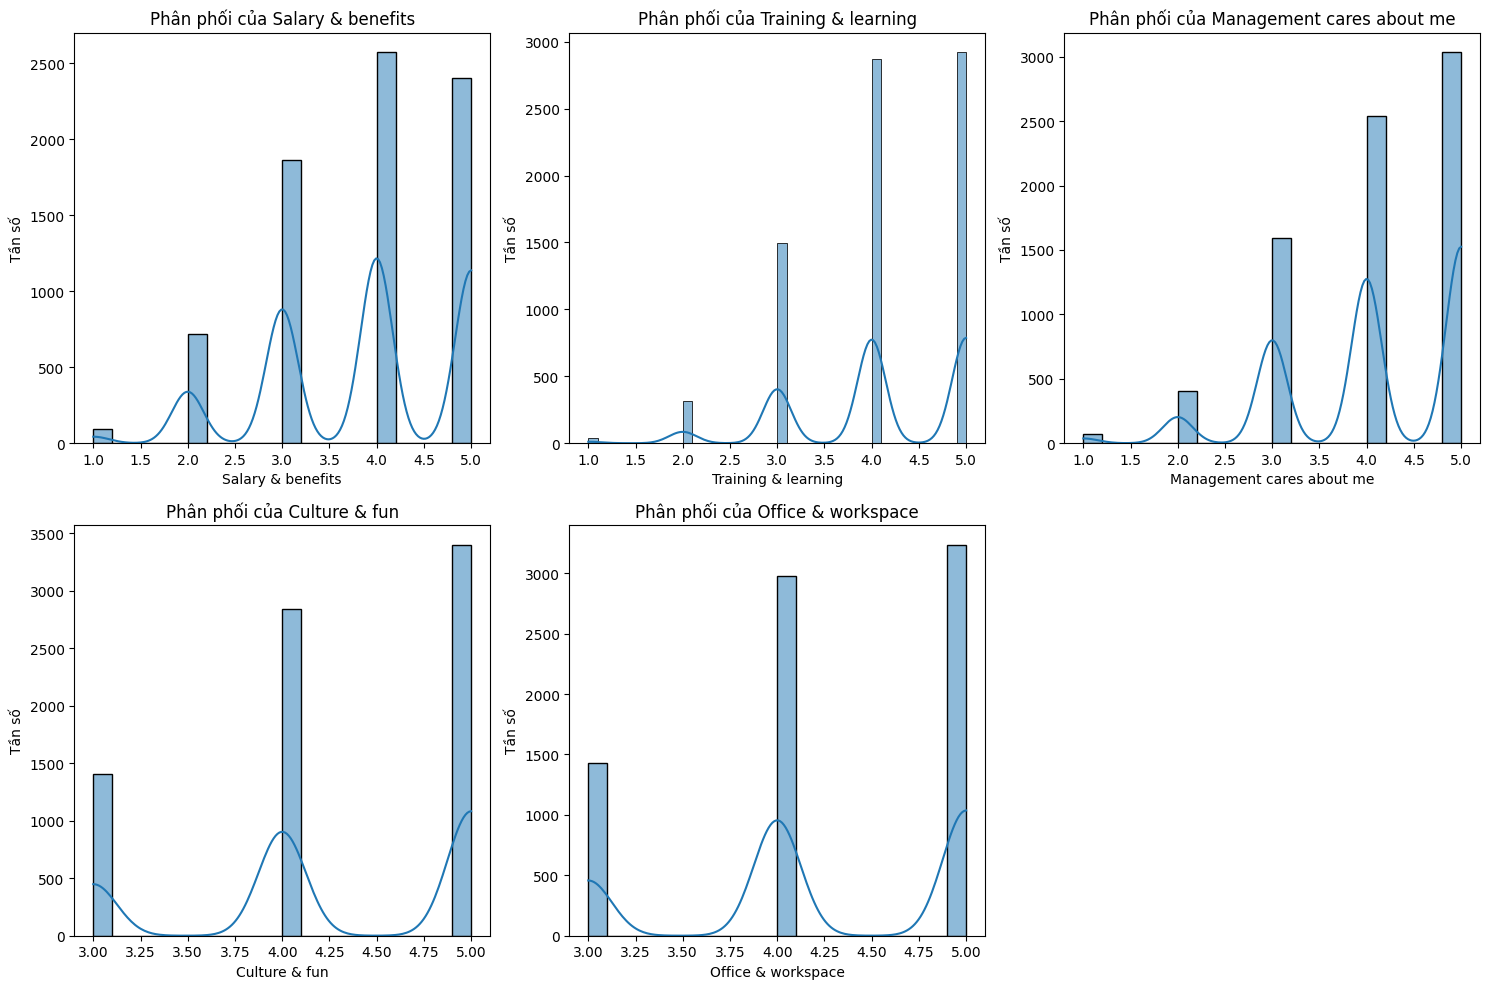

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))
for i, feature in enumerate(features):
    plt.subplot(2, 3, i + 1) # Tạo lưới 2 hàng, 3 cột
    sns.histplot(df_reviews[feature], kde=True)
    plt.title(f'Phân phối của {feature}')
    plt.xlabel(feature)
    plt.ylabel('Tần số')
plt.tight_layout()
plt.show()

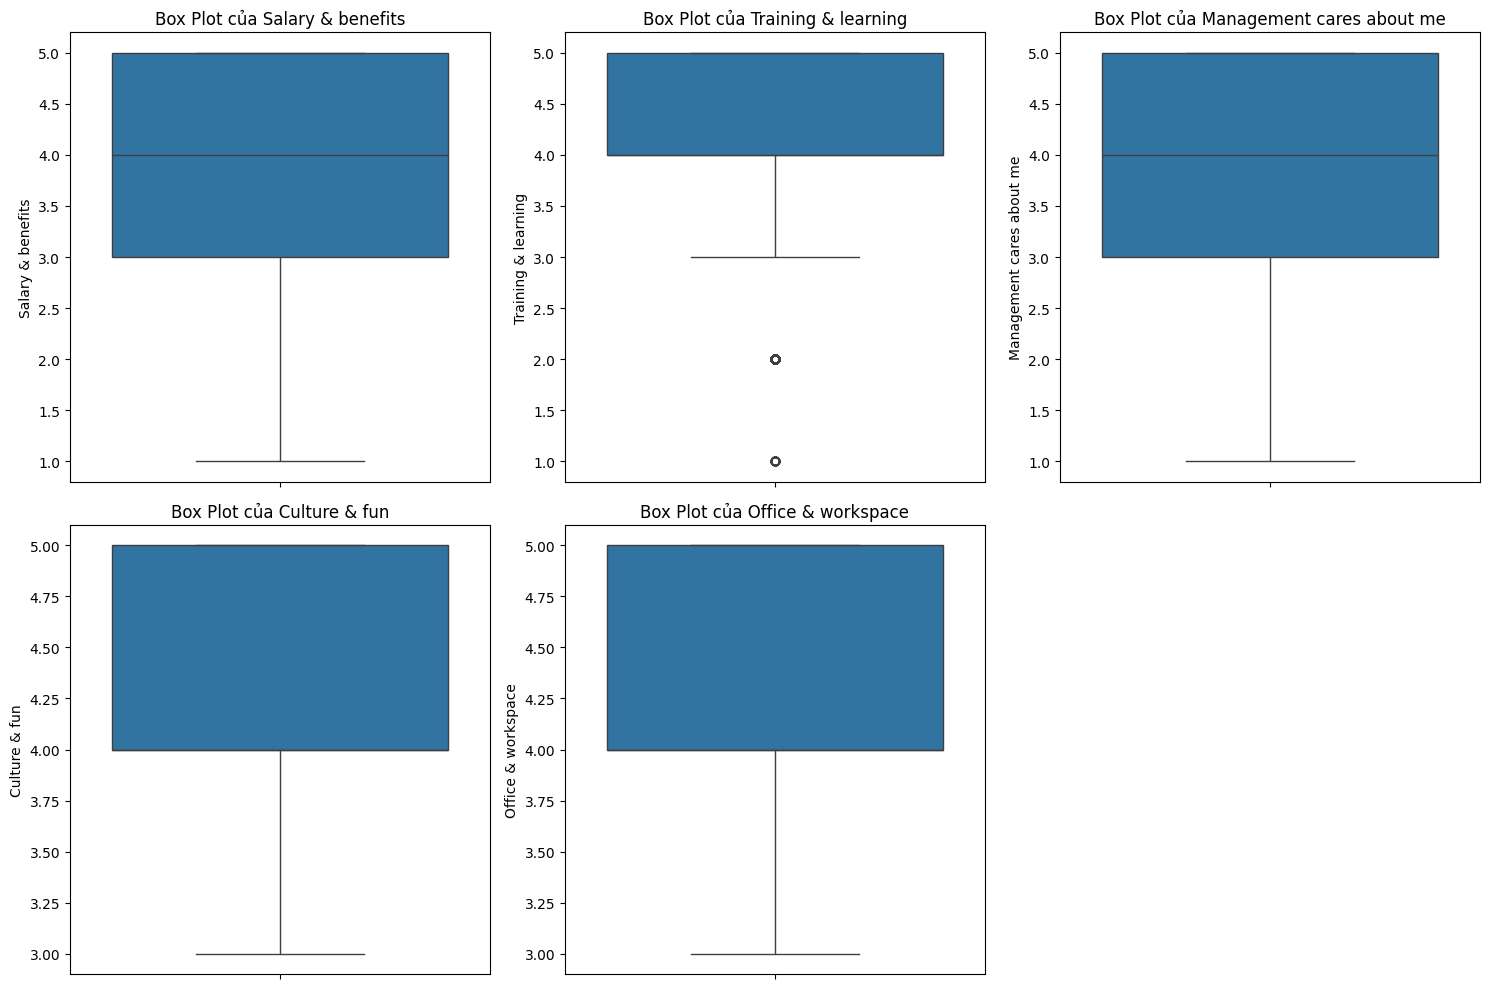

In [ ]:
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(y=df_reviews[feature])
    plt.title(f'Box Plot của {feature}')
    plt.ylabel(feature)
plt.tight_layout()
plt.show()

### 3.4. Tạo tính năng mới

#### Sentiment score

In [ ]:
# Create 'Review Content'
df_reviews['Review Content'] = df_reviews['Title'] + ' ' + df_reviews['What I liked'] + ' ' + df_reviews['Suggestions for improvement']
df_reviews['recommend'] = df_reviews['Recommend?'].map({'Yes': 1, 'No': 0})
df_reviews = df_reviews.dropna(subset=['Review Content', 'recommend'])  # bỏ dòng thiếu target


In [ ]:
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
# Áp dụng phân tích cảm xúc
df_reviews['sentiment_score'] = df_reviews['Review Content'].apply(lambda x: sid.polarity_scores(str(x))['compound'])

# Độ dài và số từ trong nội dung đánh giá
df_reviews['text_length'] = df_reviews['Review Content'].apply(lambda x: len(str(x)))
df_reviews['word_count'] = df_reviews['Review Content'].apply(lambda x: len(str(x).split()))

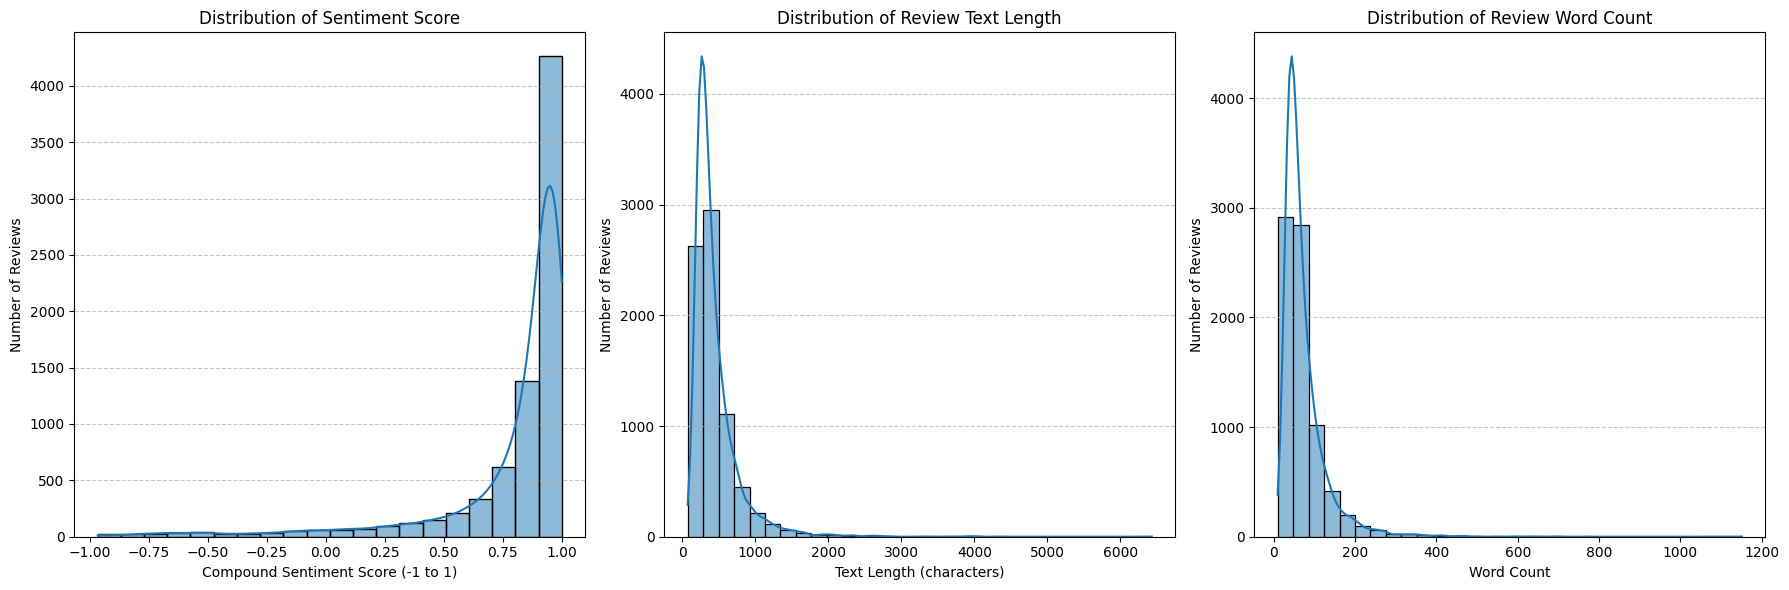

In [ ]:
# --- Visualization ---
plt.figure(figsize=(18, 6)) # Adjust figure size for better viewing

# 1. Distribution of Sentiment Score
plt.subplot(1, 3, 1) # 1 row, 3 columns, 1st plot
sns.histplot(df_reviews['sentiment_score'], bins=20, kde=True)
plt.title('Distribution of Sentiment Score')
plt.xlabel('Compound Sentiment Score (-1 to 1)')
plt.ylabel('Number of Reviews')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 2. Distribution of Text Length
plt.subplot(1, 3, 2) # 1 row, 3 columns, 2nd plot
sns.histplot(df_reviews['text_length'], bins=30, kde=True)
plt.title('Distribution of Review Text Length')
plt.xlabel('Text Length (characters)')
plt.ylabel('Number of Reviews')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 3. Distribution of Word Count
plt.subplot(1, 3, 3) # 1 row, 3 columns, 3rd plot
sns.histplot(df_reviews['word_count'], bins=30, kde=True)
plt.title('Distribution of Review Word Count')
plt.xlabel('Word Count')
plt.ylabel('Number of Reviews')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout() # Adjust subplot params for a tight layout
plt.show()

Nhận xét:
* Các tính năng mới (điểm cảm xúc, độ dài và số từ) đều cho thấy phân phối không đối xứng và mất cân bằng nghiêm trọng. Điểm cảm xúc chủ yếu là tích cực, trong khi độ dài và số từ chủ yếu là ngắn gọn

In [ ]:
# Biến đổi Logarithmic
df_reviews['text_length_log'] = np.log1p(df_reviews['text_length'])
df_reviews['word_count_log'] = np.log1p(df_reviews['word_count'])

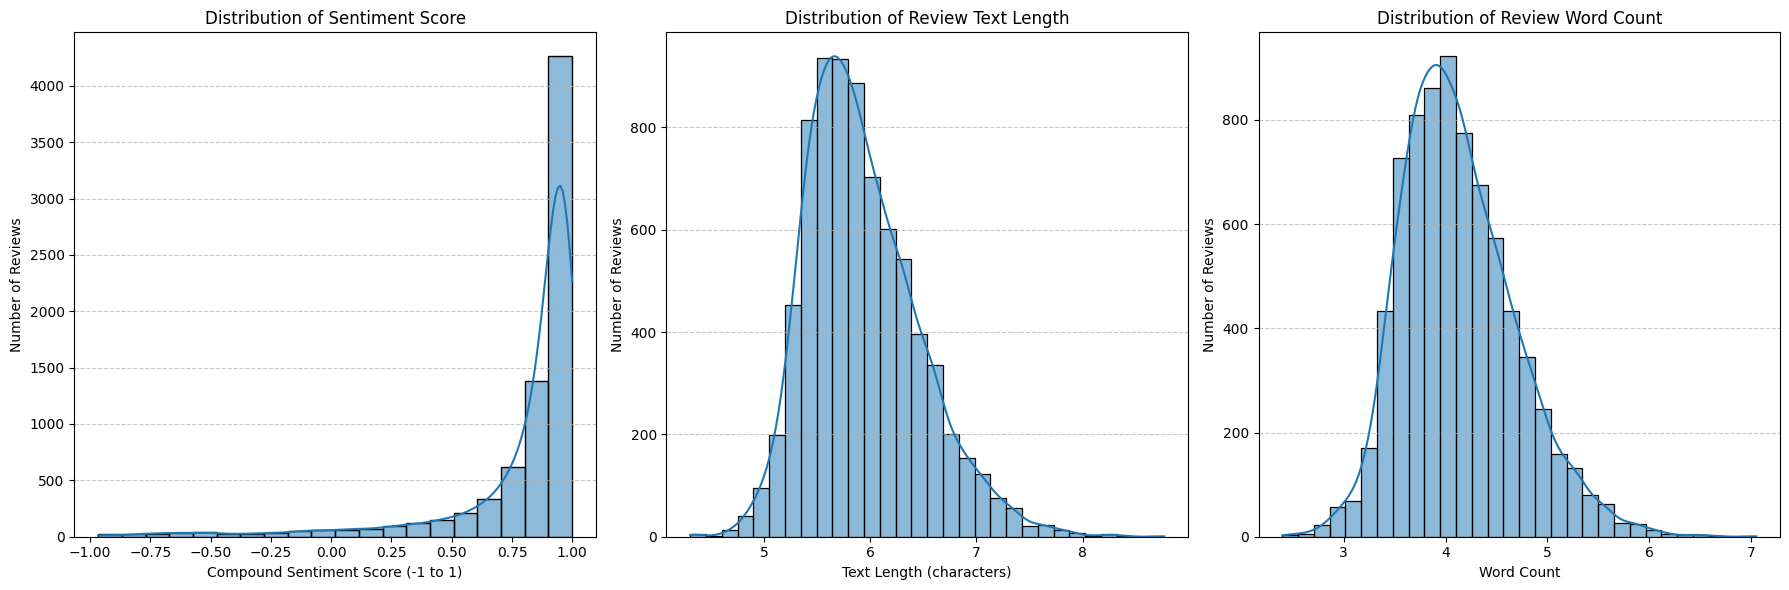

In [ ]:
# --- Visualization ---
plt.figure(figsize=(18, 6)) # Adjust figure size for better viewing

# 1. Distribution of Sentiment Score
plt.subplot(1, 3, 1) # 1 row, 3 columns, 1st plot
sns.histplot(df_reviews['sentiment_score'], bins=20, kde=True)
plt.title('Distribution of Sentiment Score')
plt.xlabel('Compound Sentiment Score (-1 to 1)')
plt.ylabel('Number of Reviews')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 2. Distribution of Text Length
plt.subplot(1, 3, 2) # 1 row, 3 columns, 2nd plot
sns.histplot(df_reviews['text_length_log'], bins=30, kde=True)
plt.title('Distribution of Review Text Length')
plt.xlabel('Text Length (characters)')
plt.ylabel('Number of Reviews')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 3. Distribution of Word Count
plt.subplot(1, 3, 3) # 1 row, 3 columns, 3rd plot
sns.histplot(df_reviews['word_count_log'], bins=30, kde=True)
plt.title('Distribution of Review Word Count')
plt.xlabel('Word Count')
plt.ylabel('Number of Reviews')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout() # Adjust subplot params for a tight layout
plt.show()

Phân phối vẫn lệch mạnh về phía tích cực tương tự như trước.
Đỉnh cao nhất vẫn nằm ở gần 1.0.

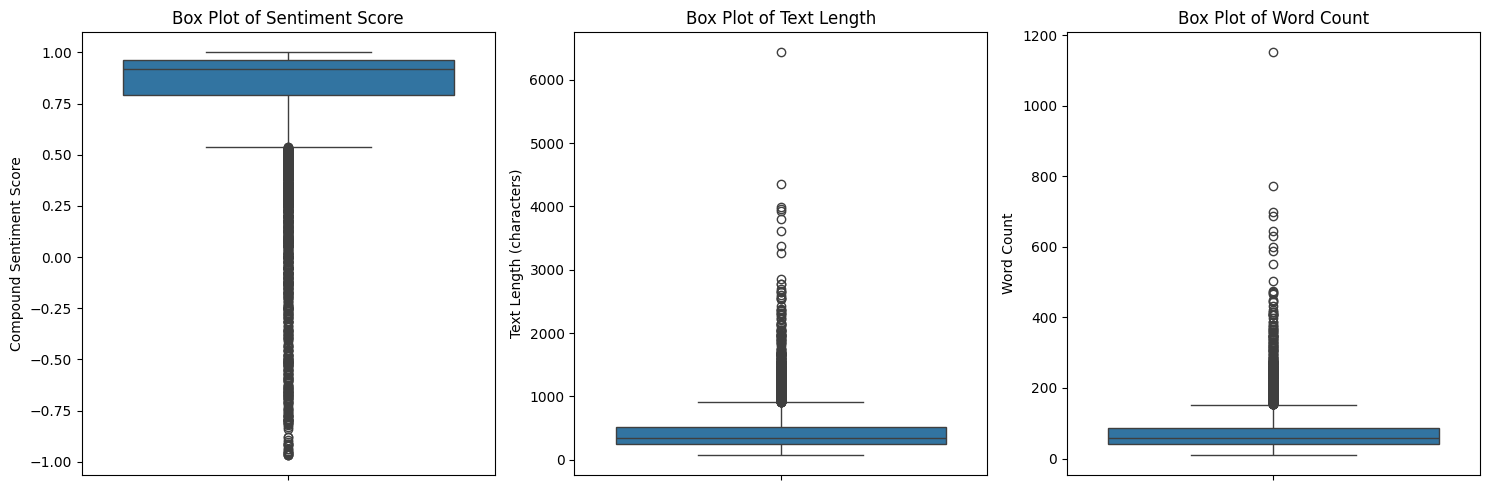

In [ ]:
# Box plots to see outliers and spread more clearly
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(y=df_reviews['sentiment_score'])
plt.title('Box Plot of Sentiment Score')
plt.ylabel('Compound Sentiment Score')

plt.subplot(1, 3, 2)
sns.boxplot(y=df_reviews['text_length'])
plt.title('Box Plot of Text Length')
plt.ylabel('Text Length (characters)')

plt.subplot(1, 3, 3)
sns.boxplot(y=df_reviews['word_count'])
plt.title('Box Plot of Word Count')
plt.ylabel('Word Count')

plt.tight_layout()
plt.show()

Nhận xét:
* Điểm cảm xúc (Sentiment Score): Phân phối lệch mạnh về phía tích cực (median và Q3 rất cao), với nhiều ngoại lệ ở phía tiêu cực, cho thấy đa số đánh giá là tích cực nhưng vẫn có những ý kiến trái chiều.
* Độ dài và số từ (Text Length & Word Count): Cả hai đều có phân phối lệch rất mạnh về phía các giá trị nhỏ/ngắn, cho thấy phần lớn các đánh giá rất ngắn gọn. Tuy nhiên, có nhiều ngoại lệ ở phía trên, đại diện cho một số ít đánh giá rất dài.

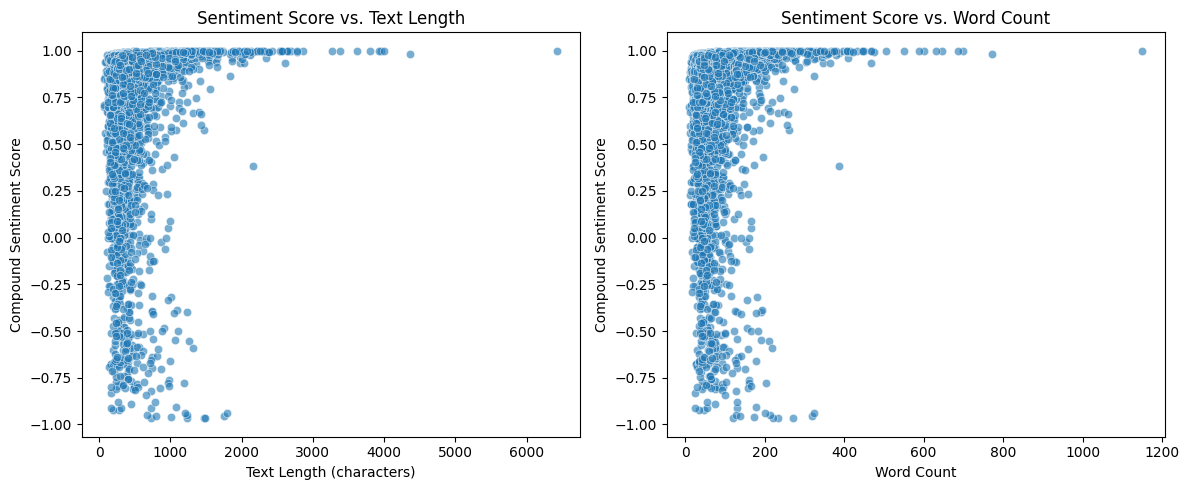

In [ ]:
# Scatter plot to see relationship between sentiment and length/word count
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(x=df_reviews['text_length'], y=df_reviews['sentiment_score'], alpha=0.6)
plt.title('Sentiment Score vs. Text Length')
plt.xlabel('Text Length (characters)')
plt.ylabel('Compound Sentiment Score')

plt.subplot(1, 2, 2)
sns.scatterplot(x=df_reviews['word_count'], y=df_reviews['sentiment_score'], alpha=0.6)
plt.title('Sentiment Score vs. Word Count')
plt.xlabel('Word Count')
plt.ylabel('Compound Sentiment Score')

plt.tight_layout()
plt.show()

Nhận xét:
* Hầu hết các điểm dữ liệu tập trung ở phía dưới bên trái của biểu đồ, tức là phần lớn các đánh giá có độ dài ngắn (cả về ký tự và số từ).
* Đối với các đánh giá ngắn này, điểm cảm xúc phân bố khá rộng, trải dài từ -1 (rất tiêu cực) đến 1 (rất tích cực). Điều này cho thấy cảm xúc có thể được biểu đạt mạnh mẽ ngay cả trong các văn bản ngắn.

#### Vector hóa văn bản + Ghép với dữ liệu định lượng

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from scipy.sparse import hstack

In [ ]:
df_reviews[features + ['Review Content', 'recommend']].head(3)

NameError: name 'features' is not defined

In [ ]:
# Vector hóa văn bản
tfidf = TfidfVectorizer(max_features=2000)
X_text = tfidf.fit_transform(df_reviews['Review Content'])

In [ ]:
ongoing_companies = '/content/gdrive/MyDrive/DL07_Data Science Thesis/DL07_K304_GiangPhiYen_NguyenNgocKhanhLinh/Week2/output/Overview_Companies_ongoing.xlsx'
ongoing_reviews = '/content/gdrive/MyDrive/DL07_Data Science Thesis/DL07_K304_GiangPhiYen_NguyenNgocKhanhLinh/Week2/output/Reviews_ongoing.xlsx'

df_companies.to_excel(ongoing_companies, index=False)
df_reviews.to_excel(ongoing_reviews, index=False)

## 4. Modeling & Evaluation

In [ ]:
# Load data - Colab
df_companies = pd.read_excel('/content/gdrive/MyDrive/DL07_Data Science Thesis/DL07_K304_GiangPhiYen_NguyenNgocKhanhLinh/Week2/output/Overview_Companies_ongoing.xlsx')
df_reviews = pd.read_excel('/content/gdrive/MyDrive/DL07_Data Science Thesis/DL07_K304_GiangPhiYen_NguyenNgocKhanhLinh/Week2/output/Reviews_ongoing.xlsx')

In [ ]:
df_companies.head()

id        Company Name                  Company Type  \
0  0.0  1BITLAB Technology                IT Outsourcing   
1  1.0               1test                    IT Product   
2  NaN    52 Entertainment                    IT Product   
3  NaN             8Seneca                IT Outsourcing   
4  NaN           Accenture  IT Service and IT Consulting   

                   Company industry       Company size      Country  \
0  Software Development Outsourcing     1-50 employees      Vietnam   
1     IT Services and IT Consulting     1-50 employees  South Korea   
2                              Game     1-50 employees       France   
3     IT Services and IT Consulting     1-50 employees    Singapore   
4     IT Services and IT Consulting  301-500 employees      Vietnam   

      Working days Overtime Policy  \
0  Monday - Friday           No OT   
1  Monday - Friday           No OT   
2  Monday - Friday           No OT   
3  Monday - Friday           No OT   
4  Monday - Friday           No OT   

                                    Company overview  \
0  1BITLAB Technology\n1bitlab Technology Joint S...   
1  1test\nIs an innovative educational technology...   
2  A start-up of French and Vietnamese guys with ...   
3  Pure play IT team extensions B2b exclusive out...   
4  A global professional services company with le...   

                                      Our key skills  \
0                                                NaN   
1                                                NaN   
2  Our Key Skills\nJava\nGames\nQA QC\nC#\nUnity\...   
3                                                NaN   
4  Our Key Skills\nCloud\nLinux\nDevOps\nNetworki...   

                        Why you'll love working here  \
0                                                NaN   
1                                                NaN   
2  Be your own boss\nA free lunch and a half day ...   
3  Ha Noi\n19F, Coninco Tower 4 Ton That Tung, Do...   
4  Hybrid working\nWonderful and Human focused En...   

                              company_overview_token  \
0  ['1BITLAB', 'Technology', '1', 'bitlab', 'Tech...   
1  ['1', 'test', 'Is an', 'innovative', 'educatio...   
2  ['A start-up', 'of French', 'and Vietnamese', ...   
3  ['Pure', 'play', 'IT', 'team', 'extensions', '...   
4  ['A global', 'professional', 'services', 'comp...   

                                    key_skills_token  \
0                                                 []   
1                                                 []   
2  ['Our', 'Key Skills', 'Java Games', 'QA QC', '...   
3                                                 []   
4  ['Our', 'Key Skills', 'Cloud Linux', 'DevOps N...   

                             love_working_here_token  \
0                                                 []   
1                                                 []   
2  ['Be', 'your', 'own', 'boss', 'A free', 'lunch...   
3  ['Ha Noi', '19F', ',', 'Coninco Tower', '4', '...   
4  ['Hybrid', 'working', 'Wonderful and', 'Human ...   

                              company_overview_lemma  \
0  ['1BITLAB', 'Technology', '1', 'bitlab', 'Tech...   
1  ['1', 'test', 'Is an', 'innovative', 'educatio...   
2  ['A start-up', 'of French', 'and Vietnamese', ...   
3  ['Pure', 'play', 'IT', 'team', 'extension', 'B...   
4  ['A global', 'professional', 'service', 'compa...   

                                    key_skills_lemma  \
0                                                 []   
1                                                 []   
2  ['Our', 'Key Skills', 'Java Games', 'QA QC', '...   
3                                                 []   
4  ['Our', 'Key Skills', 'Cloud Linux', 'DevOps N...   

                             love_working_here_lemma  \
0                                                 []   
1                                                 []   
2  ['Be', 'your', 'own', 'bos', 'A free', 'lunch'...   
3  ['Ha Noi', '19F', ',', 'Coninco Tower', '4', '...   
4  ['Hybrid

In [ ]:
df_reviews.head()

id Company Name        Cmt_day  \
0  4.0    Accenture     March 2025   
1  4.0    Accenture   January 2025   
2  4.0    Accenture   October 2023   
3  4.0    Accenture  February 2025   
4  4.0    Accenture  February 2023   

                                               Title  \
0  Comfortable environment, low pressure, can wor...   
1                          Young and dynamic company   
2            Comfortable and fun working environment   
3                       good environment for fresher   
4            Comfortable and fun working environment   

                                        What I liked  \
0  Comfortable environment, low pressure, can wor...   
1  Beautiful facilities, young and dynamic compan...   
2  Everyone is friendly and helpful. The Internsh...   
3  good env. for freshers to learn and improve th...   
4  - Beautiful office, good facilities\n- Boss an...   

                         Suggestions for improvement  Rating  \
0  It is necessary to evaluate KPIs objectively a...       4   
1  You should research the salary range of the ma...       4   
2  Because the company does outsourcing in the sy...       3   
3  Need to focus more on benefit and evaluate con...       3   
4  - Expand the office to be more spacious\n- The...       4   

   Salary & benefits  Training & learning  Management cares about me  ...  \
0                  4                    4                          4  ...   
1                  3                    4                          4  ...   
2                  3                    3                          3  ...   
3                  2                    2                          3  ...   
4                  3                    4                          4  ...   

                                         title_final  \
0  ['Comfortable', 'environment', ',', 'low press...   
1                ['Young', 'and dynamic', 'company']   
2  ['Comfortable', 'and fun', 'working', 'environ...   
3                 ['good', 'environment', 'fresher']   
4  ['Comfortable', 'and fun', 'working', 'environ...   

                                         liked_final  \
0  ['Comfortable', 'environment', ',', 'low press...   
1  ['Beautiful', 'facility', ',', 'young and', 'd...   
2  ['Everyone', 'is friendly', 'and helpful', '.'...   
3  ['good', 'env', '.', 'fresher', 'to learn', 'a...   
4  ['-', 'Beautiful office', ',', 'good', 'facili...   

                                   suggestions_final  \
0  ['It', 'necessary', 'evaluate', 'KPIs objectiv...   
1  ['You', 'research', 'salary', 'range', 'of the...   
2  ['Because', 'company', 'doe', 'outsourcing', '...   
3  ['Need', 'focus', 'on benefit', 'and evaluate'...   
4  ['-', 'Expand', 'office', 'spacious', '-', 'Th...   

                                      Review Content recommend  \
0  Comfortable environment, low pressure, can wor...         1   
1  Young and dynamic company Beautiful facilities...         1   
2  Comfortable and fun working environment Everyo...         1   
3  good environment for fresher good env. for fre...         0   
4  Comfortable and fun working environment - Beau...         1   

  sentiment_score text_length word_count text_length_log word_count_log  
0          0.8807         572         88        6.350886       4.488636  
1          0.5035         393         64        5.976351       4.174387  
2          0.9245         483         80        6.182085       4.394449  
3          0.9310         258         41        5.556828       3.737670  
4          0.9887         353         54        5.869297       4.007333  

[5 rows x 29 columns]

In [ ]:
# Xử lý dữ liệu trong cột id, đồng nhất giá trị theo theo Company Name
company_id_map = {name: idx for idx, name in enumerate(df_companies['Company Name'].unique())}
df_companies['id'] = df_companies['Company Name'].map(company_id_map)
df_reviews['id'] = df_reviews['Company Name'].map(company_id_map)

### 4.1 Yêu cầu 1: Content-Based Filtering

#### Gensim + Similarity Index


In [ ]:
# Xử lý từng phần tử trong danh sách
import ast
texts = df_companies['company_overview_final'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x).tolist()

In [ ]:
print(type(texts[0]), texts[0])

<class 'list'> ['Blab', 'Technology Blab', 'Technology Joint', 'Stock', 'Company', 'Field of', 'Operation It', 'Specializing', 'Blockchain', 'Ai', 'The company work', 'JapanSe Customers', 'The Staff is', 'Young Enthusiastic', 'and update', 'Quickly Approaching', 'The Development of', 'the Market', 'and Constanty', 'Changing Abo', 'The Working Envility', 'With the', 'management', 'team', 'provided', 'speclized', 'Knowledge', 'an oppadunity', 'improve', 'design', 'additionalating', 'many', 'large', 'partner', 'world', 'a sustainable', 'and Professional', 'Career Development', 'Orientation Orientational', 'Orientational']


In [ ]:
# !pip install gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 70.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 69.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 20.8 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.15.3
    Uninstalling scipy-1.15.3:
      Successfully uninstalled scipy-1.15.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tsfresh 0.21.0 requires scipy>=1.14.0; python_version >= "3.10", but you have scipy 1.13.1 which is incompatible.
thinc 8.3.6 req

In [ ]:
from gensim import corpora, models

# Tạo dictionary và corpus
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

# Tạo mô hình TF-IDF
tfidf = models.TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]

In [ ]:
from gensim.similarities import Similarity

# Tạo similarity_index
similarity_index = Similarity(output_prefix="sim_index", corpus=corpus_tfidf, num_features=len(dictionary))

# Xuất các công ty tương tự dùng Gensim + Similarity Index
def recommend_companies_gensim(company_id, df_companies, top_k=5):
    idx_list = df_companies[df_companies['id'] == company_id].index
    if len(idx_list) == 0:
        print("Không tìm thấy id này!")
        return pd.DataFrame()
    company_index = idx_list[0]
    query_vec = corpus_tfidf[company_index]
    sims = similarity_index[query_vec]
    sims[company_index] = -1  # Loại chính nó
    top_indices = np.argsort(sims)[::-1][:top_k]
    result = df_companies.iloc[top_indices][['id', 'Company Name']].copy()
    result['Similarity'] = np.round(sims[top_indices], 3)
    return result.reset_index(drop=True)

In [ ]:
# Ví dụ sử dụng recommend_companies_gensim xuất 5 công ty tương tự:
company_id = 5  # Thay bằng id muốn tìm
recommend_companies_gensim(company_id, df_companies, top_k=5)

id         Company Name  Similarity
0  355  Prime Tech Solution       0.047
1   71            CODE LEAP       0.034
2  217   HONGTHAI Technical       0.030
3  144               DIIJAM       0.023
4  452        Viettel Group       0.022

from matplotlib import pyplot as plt
_df_0['id'].plot(kind='hist', bins=20, title='id')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Similarity'].plot(kind='hist', bins=20, title='Similarity')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('Company Name').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3.plot(kind='scatter', x='id', y='Similarity', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4['id'].plot(kind='line', figsize=(8, 4), title='id')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_5['Similarity'].plot(kind='line', figsize=(8, 4), title='Similarity')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_6['Company Name'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_6, x='id', y='Company Name', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_7['Company Name'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_7, x='Similarity', y='Company Name', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

#### cosine_similarity + gensim

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from gensim.matutils import corpus2csc

In [ ]:
# Chuyển thành sparse matrix
tfidf_sparse = corpus2csc(corpus_tfidf).transpose()

# Tạo similarity matrix
similarity_matrix = cosine_similarity(tfidf_sparse)

# Xuất các công ty tương tự bằng Gensim + Cosine Similarity
def recommend_companies_gensim_cosine(company_id, df_companies, top_k=5):
    idx_list = df_companies[df_companies['id'] == company_id].index
    if len(idx_list) == 0:
        print("Không tìm thấy id này!")
        return pd.DataFrame()
    company_index = idx_list[0]
    sims = list(enumerate(similarity_matrix[company_index]))
    sims = sorted(sims, key=lambda x: x[1], reverse=True)[1:top_k+1]
    recommendations = []
    for i, score in sims:
        recommendations.append({
            'id': df_companies.iloc[i]['id'],
            'Company Name': df_companies.iloc[i]['Company Name'],
            'Similarity': round(score, 3)
        })
    return pd.DataFrame(recommendations)

In [ ]:
# Ví dụ sử dụng recommend_companies_gensim_cosine xuất 5 công ty tương tự:
company_id = 5  # Thay bằng id muốn tìm
recommend_companies_gensim_cosine(company_id, df_companies, top_k=5)

id         Company Name  Similarity
0  355  Prime Tech Solution       0.047
1   71            CODE LEAP       0.034
2  217   HONGTHAI Technical       0.030
3  144               DIIJAM       0.023
4  452        Viettel Group       0.022

### 4.2 Yêu cầu 2: Classification for "Recommend"

#### Machine Learning với Python (scikit-learn)
* K-Nearest Neighbors (KNN)
* Support Vector Machine (SVM)
* Logistic Regression
* DecisionTreeClassifier
* RandomForestClassifier


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy.sparse import hstack

In [ ]:
# Dữ liệu số
features = ['Salary & benefits', 'Training & learning', 'Management cares about me',
              'Culture & fun', 'Office & workspace']

# Map 'Recommend?' to numerical labels and drop NaNs in the target variable
df_reviews['recommend'] = df_reviews['Recommend?'].map({'Yes': 1, 'No': 0})
df_reviews = df_reviews.dropna(subset=['recommend']) # Ensure no NaNs in the target

# Now recreate X and y from the cleaned dataframe
tfidf = TfidfVectorizer(max_features=2000)
X_text = tfidf.fit_transform(df_reviews['Review Content']) # Re-vectorize based on the cleaned data
X_num = StandardScaler().fit_transform(df_reviews[features]) # Re-scale based on the cleaned data

# Ghép với dữ liệu định lượng
X = hstack([X_text, X_num])
y = df_reviews['recommend'] # Use the cleaned 'recommend' column


In [ ]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##### Xử lý mất cân bằng do tỷ lệ Yes/No quá lệch

Distribution of 'Recommend?':
recommend
1    7084
0     556
Name: count, dtype: int64


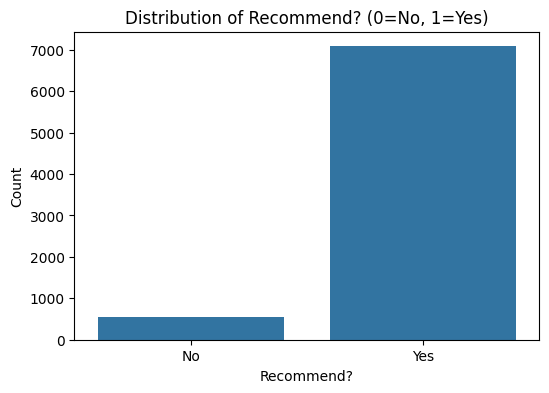


Imbalance percentage (Minority count / Majority count): 7.85%
The 'recommend' variable is likely imbalanced.


In [ ]:
# Kiểm tra tỷ lệ recommend xem có mất cân bằng không

# Check the distribution of the target variable 'recommend'
recommend_counts = df_reviews['recommend'].value_counts()

print("Distribution of 'Recommend?':")
print(recommend_counts)

# Visualize the distribution
plt.figure(figsize=(6, 4))
sns.barplot(x=recommend_counts.index, y=recommend_counts.values)
plt.title('Distribution of Recommend? (0=No, 1=Yes)')
plt.xlabel('Recommend?')
plt.ylabel('Count')
plt.xticks([0, 1], ['No', 'Yes']) # Set x-axis labels
plt.show()

# Calculate and print the imbalance percentage
total_samples = recommend_counts.sum()
imbalance_percentage = (recommend_counts.min() / recommend_counts.max()) * 100 if total_samples > 0 and recommend_counts.max() > 0 else 0

print(f"\nImbalance percentage (Minority count / Majority count): {imbalance_percentage:.2f}%")

if imbalance_percentage < 50: # Threshold can be adjusted
    print("The 'recommend' variable is likely imbalanced.")
else:
    print("The 'recommend' variable appears relatively balanced.")

Shape of X_train before SMOTE: (6112, 2005)
Shape of y_train before SMOTE: (6112,)
Shape of X_res after SMOTE: (11346, 2005)
Shape of y_res after SMOTE: (11346,)

Distribution of 'Recommend?' after SMOTE:
recommend
1    5673
0    5673
Name: count, dtype: int64


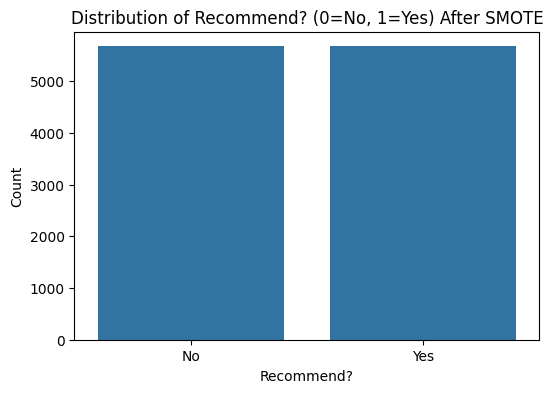

In [ ]:
# prompt: Xử lý mất cân bằng

# Xử lý mất cân bằng bằng SMOTE (đối với dữ liệu kết hợp sparse matrix và dense array)
from imblearn.over_sampling import SMOTE

# SMOTE làm việc với numpy array, nên cần chuyển sparse matrix sang dense cho SMOTE
# X_train_dense = X_train.toarray() # Có thể gây tốn bộ nhớ nếu X_train lớn

# Kết hợp dữ liệu văn bản và số thành mảng dense tạm thời cho SMOTE
# Hoặc xử lý riêng từng loại rồi kết hợp lại sau
# Cách 1: Chuyển toàn bộ sang dense (có thể tốn bộ nhớ)
# X_train_dense = X_train.toarray()
# smote = SMOTE(random_state=42)
# X_res, y_res = smote.fit_resample(X_train_dense, y_train)

# Cách 2: Xử lý trên sparse matrix (cần đảm bảo phiên bản imblearn hỗ trợ)
# SMOTE có thể hoạt động trực tiếp trên sparse matrix
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train, y_train)

print("Shape of X_train before SMOTE:", X_train.shape)
print("Shape of y_train before SMOTE:", y_train.shape)
print("Shape of X_res after SMOTE:", X_res.shape)
print("Shape of y_res after SMOTE:", y_res.shape)

# Check the new distribution
recommend_counts_resampled = pd.Series(y_res).value_counts()
print("\nDistribution of 'Recommend?' after SMOTE:")
print(recommend_counts_resampled)

# Visualize the new distribution
plt.figure(figsize=(6, 4))
sns.barplot(x=recommend_counts_resampled.index, y=recommend_counts_resampled.values)
plt.title('Distribution of Recommend? (0=No, 1=Yes) After SMOTE')
plt.xlabel('Recommend?')
plt.ylabel('Count')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()


##### Modeling & evaluation

In [ ]:
models = {
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(probability=True),
    'LogisticRegression': LogisticRegression(),
    'DecisionTree': DecisionTreeClassifier(),
    'RandomForest': RandomForestClassifier()
}

results_python = {}

for name, model in models.items():
    print(f"Đang huấn luyện model: {name}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:,1]

    # Get classification report
    report = classification_report(y_test, y_pred, output_dict=True)

    # Store relevant metrics
    results_python[name] = {
        "accuracy": report['accuracy'],
        "precision": report['macro avg']['precision'], # Sử dụng macro avg hoặc weighted avg tùy theo nhu cầu
        "recall": report['macro avg']['recall'],       # Sử dụng macro avg hoặc weighted avg tùy theo nhu cầu
        "f1-score": report['macro avg']['f1-score'],   # Sử dụng macro avg hoặc weighted avg tùy theo nhu cầu
        "roc_auc": roc_auc_score(y_test, y_proba)
    }
    print(f"Hoàn thành huấn luyện model: {name}")


# Tạo DataFrame từ kết quả
results_df = pd.DataFrame.from_dict(results_python, orient='index')

# Sắp xếp các cột theo thứ tự mong muốn
results_df = results_df[['accuracy', 'precision', 'recall', 'f1-score', 'roc_auc']]

# Định dạng hiển thị
results_df = results_df.applymap(lambda x: f"{x:.3f}")

print("\nBảng so sánh kết quả các Model:")
display(results_df)


Đang huấn luyện model: KNN
Hoàn thành huấn luyện model: KNN
Đang huấn luyện model: SVM
Hoàn thành huấn luyện model: SVM
Đang huấn luyện model: LogisticRegression
Hoàn thành huấn luyện model: LogisticRegression
Đang huấn luyện model: DecisionTree
Hoàn thành huấn luyện model: DecisionTree
Đang huấn luyện model: RandomForest
Hoàn thành huấn luyện model: RandomForest

Bảng so sánh kết quả các Model:


/tmp/ipython-input-109-2455215061.py:38: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  results_df = results_df.applymap(lambda x: f"{x:.3f}")


accuracy precision recall f1-score roc_auc
KNN                   0.937     0.819  0.656    0.704   0.753
SVM                   0.940     0.882  0.634    0.689   0.818
LogisticRegression    0.943     0.901  0.652    0.711   0.895
DecisionTree          0.910     0.667  0.638    0.650   0.638
RandomForest          0.926     0.963  0.517    0.514   0.886

/tmp/ipython-input-110-3917370864.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df.index, y=results_df[metric], palette='viridis')
/tmp/ipython-input-110-3917370864.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df.index, y=results_df[metric], palette='viridis')
/tmp/ipython-input-110-3917370864.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df.index, y=results_df[metric], palette='viridis')
/tmp/ipython-input-110-3917370864.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is 

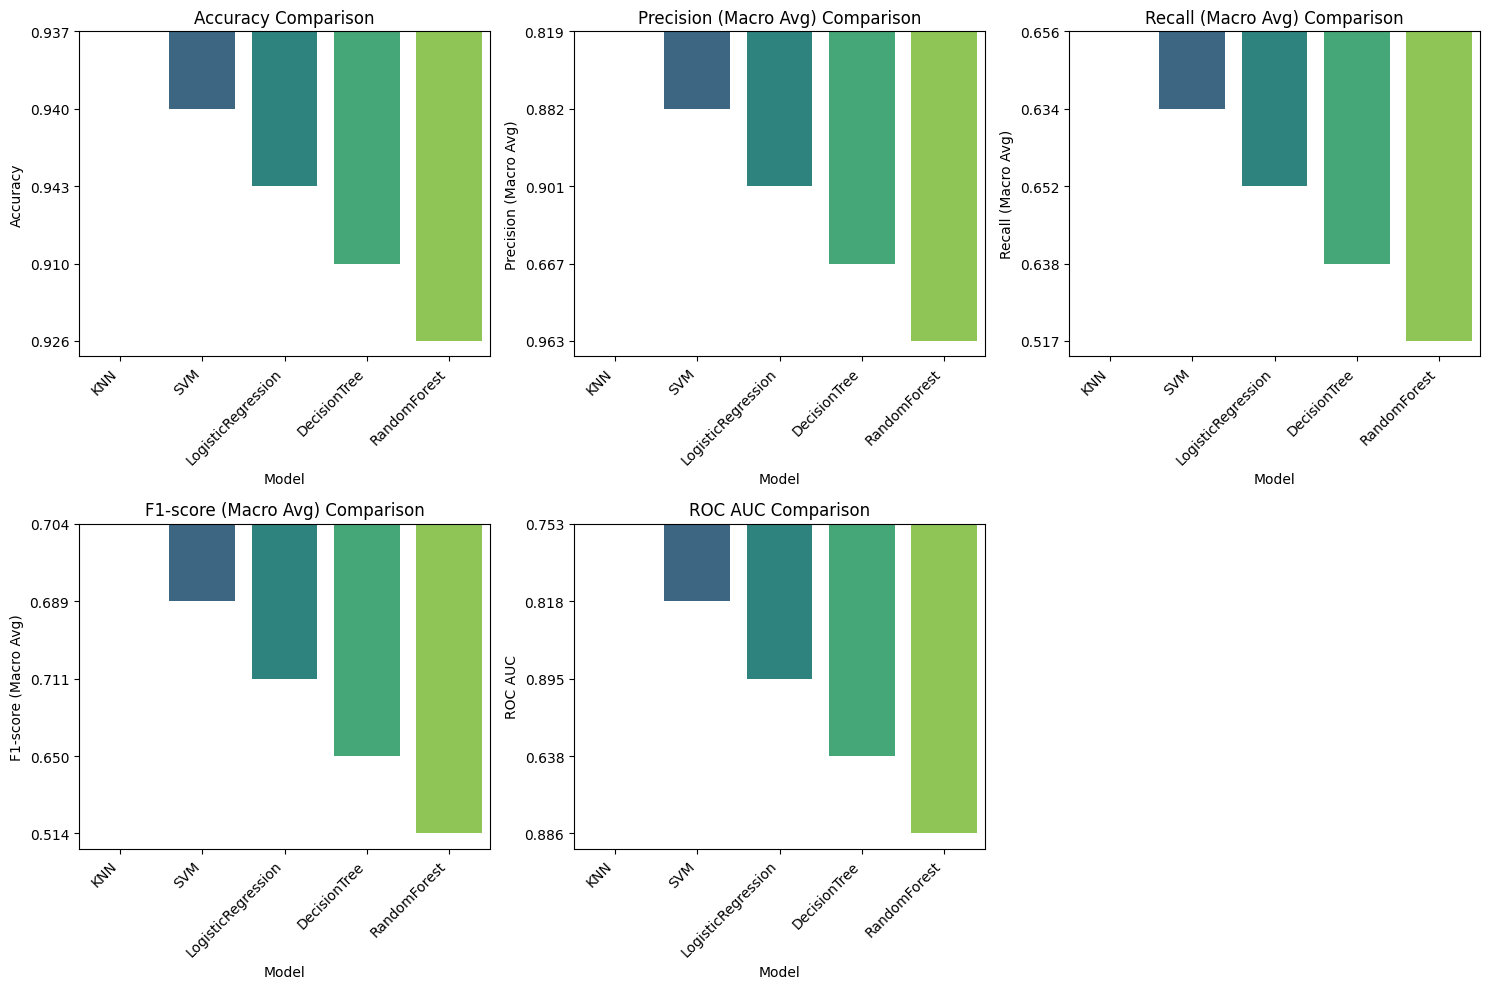

In [ ]:
# --- Trực quan hóa kết quả ---
metrics = ['accuracy', 'precision', 'recall', 'f1-score', 'roc_auc']
metric_titles = {
    'accuracy': 'Accuracy',
    'precision': 'Precision (Macro Avg)',
    'recall': 'Recall (Macro Avg)',
    'f1-score': 'F1-score (Macro Avg)',
    'roc_auc': 'ROC AUC'
}

plt.figure(figsize=(15, 10)) # Điều chỉnh kích thước hình tổng thể

for i, metric in enumerate(metrics):
    plt.subplot(2, 3, i + 1) # Tạo lưới 2 hàng, 3 cột
    sns.barplot(x=results_df.index, y=results_df[metric], palette='viridis')
    plt.title(f'{metric_titles[metric]} Comparison')
    plt.ylabel(metric_titles[metric])
    plt.xlabel('Model')
    plt.xticks(rotation=45, ha='right') # Xoay nhãn trục x để dễ đọc

plt.tight_layout() # Tự động điều chỉnh khoảng cách giữa các subplot
plt.show()

* KNN: Thường hoạt động tốt trên dữ liệu cân bằng và không quá phức tạp. Cần đánh giá hiệu suất trên các chỉ số sau khi xử lý mất cân bằng.
* SVM: Mạnh mẽ trong việc tìm ranh giới phân loại phức tạp. Có thể hoạt động tốt nhưng đôi khi tốn kém về mặt tính toán.
* Logistic Regression: Một mô hình tuyến tính đơn giản, cung cấp xác suất trực tiếp và thường là baseline tốt.
* Decision Tree: Dễ hiểu và diễn giải, nhưng có thể bị overfit.
* Random Forest: Một ensemble model (tập hợp nhiều cây quyết định) thường có hiệu suất cao và giảm thiểu vấn đề overfit của Decision Tree đơn lẻ.

Qua các biểu đồ, có thể thấy rằng **RandomForestClassifier thể hiện hiệu suất vượt trội** trên hầu hết các chỉ số quan trọng (Precision, Recall, F1-score, ROC AUC). Điều này cho thấy Random Forest có khả năng phân loại tốt nhất giữa các công ty được recommend và không được recommend, đồng thời xử lý tương đối tốt sự mất cân bằng trong dữ liệu.

#### Machine Learning với PySpark
* Naive Bayes
* Gradient-Boosted Trees (GBTs)
* Logistic Regression
* DecisionTreeClassifier
* RandomForestClassifier


##### Khởi tạo PySpark

In [ ]:
!pip install pyspark
!pip install findspark

In [ ]:
import findspark
findspark.init()

from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("RecommendClassificationSpark").getOrCreate()

##### Load & xử lý dữ liệu

In [ ]:
from pyspark.sql.functions import concat_ws, col, when, sum as spark_sum
from pyspark.ml.feature import Tokenizer, StopWordsRemover, HashingTF, IDF, VectorAssembler, StringIndexer
from pyspark.ml import Pipeline
from pyspark.ml.classification import LogisticRegression, DecisionTreeClassifier, RandomForestClassifier, GBTClassifier, NaiveBayes
from pyspark.ml.evaluation import BinaryClassificationEvaluator, MulticlassClassificationEvaluator


In [ ]:
spark = SparkSession.builder.appName("RecommendClassificationSpark").config("spark.jars.packages", "com.crealytics:spark-excel_2.12:0.14.0").getOrCreate()

In [ ]:
df_reviews.columns

Index(['id', 'Company Name', 'Cmt_day', 'Title', 'What I liked',
       'Suggestions for improvement', 'Rating', 'Salary & benefits',
       'Training & learning', 'Management cares about me', 'Culture & fun',
       'Office & workspace', 'Recommend?', 'title_token', 'liked_token',
       'suggestions_token', 'title_lemma', 'liked_lemma', 'suggestions_lemma',
       'title_final', 'liked_final', 'suggestions_final', 'Review Content',
       'recommend', 'sentiment_score', 'text_length', 'word_count',
       'text_length_log', 'word_count_log'],
      dtype='object')

In [ ]:
label_indexer = StringIndexer(inputCol="recommend", outputCol="label").setHandleInvalid("skip")

In [ ]:
tokenizer = Tokenizer(inputCol='Review Content', outputCol="words") # Sử dụng Review Content
remover = StopWordsRemover(inputCol="words", outputCol="filtered", stopWords=StopWordsRemover.loadDefaultStopWords("english"))
hashing_tf = HashingTF(inputCol="filtered", outputCol="rawFeatures", numFeatures=2000)
idf = IDF(inputCol="rawFeatures", outputCol="textFeatures", minDocFreq=5)


In [ ]:
assembler = VectorAssembler(inputCols= ['textFeatures'] + features,
                            outputCol="features",
                            handleInvalid="skip"
)

In [ ]:
pipeline = Pipeline(stages=[label_indexer, tokenizer, remover, hashing_tf, idf, assembler])

In [ ]:
# Convert the pandas DataFrame to a PySpark DataFrame
spark_df_reviews = spark.createDataFrame(df_reviews)

In [ ]:
# Fit pipeline trên toàn bộ dữ liệu
model_pipeline = pipeline.fit(spark_df_reviews)

In [ ]:
# Transform dữ liệu
processed_df = model_pipeline.transform(spark_df_reviews).select("features", "label")

In [ ]:
# Kiểm tra dữ liệu đã xử lý
print("\nSchema của dữ liệu đã xử lý:")
processed_df.printSchema()
print("Dữ liệu đã xử lý (hiển thị 5 dòng):")
processed_df.show(5, truncate=False)


Schema của dữ liệu đã xử lý:
root
 |-- features: vector (nullable = true)
 |-- label: double (nullable = false)

Dữ liệu đã xử lý (hiển thị 5 dòng):
+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

##### Modeling & evaluation

In [ ]:
# Train - test split
train_df, test_df = processed_df.randomSplit([0.8, 0.2], seed=42)
print(f"\nKích thước tập huấn luyện: {train_df.count()} dòng")
print(f"Kích thước tập kiểm tra: {test_df.count()} dòng")


Kích thước tập huấn luyện: 6181 dòng
Kích thước tập kiểm tra: 1459 dòng


In [ ]:
# Modeling
models_spark = {
    'NaiveBayes': NaiveBayes(smoothing=1.0, modelType="multinomial"),
    'LogisticRegression': LogisticRegression(maxIter=100, regParam=0.01),
    'DecisionTree': DecisionTreeClassifier(maxDepth=10, impurity="gini"),
    'RandomForest': RandomForestClassifier(numTrees=50, maxDepth=10),
    'GBTClassifier': GBTClassifier(maxIter=20, maxDepth=5)
}

# Evaluators
binary_evaluator = BinaryClassificationEvaluator(rawPredictionCol="rawPrediction", labelCol="label", metricName="areaUnderROC")
pr_evaluator = BinaryClassificationEvaluator(rawPredictionCol="rawPrediction", labelCol="label", metricName="areaUnderPR")
multi_evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")

In [ ]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator, BinaryClassificationEvaluator
import pandas as pd

# Chuẩn bị evaluator
evaluator_auc = BinaryClassificationEvaluator(metricName="areaUnderROC")
evaluator_pr = BinaryClassificationEvaluator(metricName="areaUnderPR")
evaluator_precision = MulticlassClassificationEvaluator(metricName="precisionByLabel")
evaluator_recall = MulticlassClassificationEvaluator(metricName="recallByLabel")
evaluator_f1 = MulticlassClassificationEvaluator(metricName="f1")

results_spark = {}

for name, model in models_spark.items():
    print(f"\n🔧 Đang huấn luyện model: {name}")
    try:
        model_fitted = model.fit(train_df)
        predictions = model_fitted.transform(test_df)

        auc = evaluator_auc.evaluate(predictions)
        pr_auc = evaluator_pr.evaluate(predictions)
        precision = evaluator_precision.evaluate(predictions, {evaluator_precision.metricLabel: 1.0})
        recall = evaluator_recall.evaluate(predictions, {evaluator_recall.metricLabel: 1.0})
        f1 = evaluator_f1.evaluate(predictions)

        results_spark[name] = {
            "ROC AUC": round(auc, 3),
            "PR AUC": round(pr_auc, 3),
            "Precision": round(precision, 3),
            "Recall": round(recall, 3),
            "F1-score": round(f1, 3)
        }

        print(f"✅ {name} done")
        print(f"ROC AUC   : {auc:.3f}")
        print(f"PR AUC    : {pr_auc:.3f}")
        print(f"Precision : {precision:.3f}")
        print(f"Recall    : {recall:.3f}")
        print(f"F1-score  : {f1:.3f}")
        print("-" * 40)

    except Exception as e:
        results_spark[name] = {"error": str(e)}
        print(f"❌ Lỗi ở model {name}: {e}")
        print("-" * 40)

# ✅ Chuyển sang DataFrame (bỏ các model lỗi)
results_for_df = {k: v for k, v in results_spark.items() if "error" not in v}
results_df_spark = pd.DataFrame.from_dict(results_for_df, orient='index')

# Định dạng số đẹp
results_df_spark_formatted = results_df_spark.applymap(lambda x: f"{x:.3f}")

print("\n📊 Bảng so sánh kết quả các Model PySpark:")
display(results_df_spark_formatted)



🔧 Đang huấn luyện model: NaiveBayes
✅ NaiveBayes done
ROC AUC   : 0.591
PR AUC    : 0.102
Precision : 0.203
Recall    : 0.396
F1-score  : 0.878
----------------------------------------

🔧 Đang huấn luyện model: LogisticRegression
✅ LogisticRegression done
ROC AUC   : 0.849
PR AUC    : 0.349
Precision : 0.400
Recall    : 0.229
F1-score  : 0.917
----------------------------------------

🔧 Đang huấn luyện model: DecisionTree
✅ DecisionTree done
ROC AUC   : 0.248
PR AUC    : 0.050
Precision : 0.535
Recall    : 0.240
F1-score  : 0.925
----------------------------------------

🔧 Đang huấn luyện model: RandomForest
✅ RandomForest done
ROC AUC   : 0.904
PR AUC    : 0.509
Precision : 0.000
Recall    : 0.000
F1-score  : 0.902
----------------------------------------

🔧 Đang huấn luyện model: GBTClassifier
✅ GBTClassifier done
ROC AUC   : 0.905
PR AUC    : 0.513
Precision : 0.703
Recall    : 0.271
F1-score  : 0.933
----------------------------------------

📊 Bảng so sánh kết quả các Model PySpar

/tmp/ipython-input-126-1240026567.py:51: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  results_df_spark_formatted = results_df_spark.applymap(lambda x: f"{x:.3f}")


ROC AUC PR AUC Precision Recall F1-score
NaiveBayes           0.591  0.102     0.203  0.396    0.878
LogisticRegression   0.849  0.349     0.400  0.229    0.917
DecisionTree         0.248  0.050     0.535  0.240    0.925
RandomForest         0.904  0.509     0.000  0.000    0.902
GBTClassifier        0.905  0.513     0.703  0.271    0.933

from matplotlib import pyplot as plt
import seaborn as sns
results_df_spark_formatted.groupby('ROC AUC').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
results_df_spark_formatted.groupby('PR AUC').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
results_df_spark_formatted.groupby('Precision').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
results_df_spark_formatted.groupby('Recall').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['PR AUC'].value_counts()
    for x_label, grp in results_df_spark_formatted.groupby('ROC AUC')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('ROC AUC')
_ = plt.ylabel('PR AUC')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Precision'].value_counts()
    for x_label, grp in results_df_spark_formatted.groupby('PR AUC')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('PR AUC')
_ = plt.ylabel('Precision')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Recall'].value_counts()
    for x_label, grp in results_df_spark_formatted.groupby('Precision')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Precision')
_ = plt.ylabel('Recall')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['F1-score'].value_counts()
    for x_label, grp in results_df_spark_formatted.groupby('Recall')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Recall')
_ = plt.ylabel('F1-score')

/tmp/ipython-input-127-4154047804.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df_spark.index, y=results_df_spark[metric], palette='viridis')
/tmp/ipython-input-127-4154047804.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df_spark.index, y=results_df_spark[metric], palette='viridis')
/tmp/ipython-input-127-4154047804.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df_spark.index, y=results_df_spark[metric], palette='viridis')
/tmp/ipython-input-127-4154047804.py:26: FutureWarning: 

Passing `

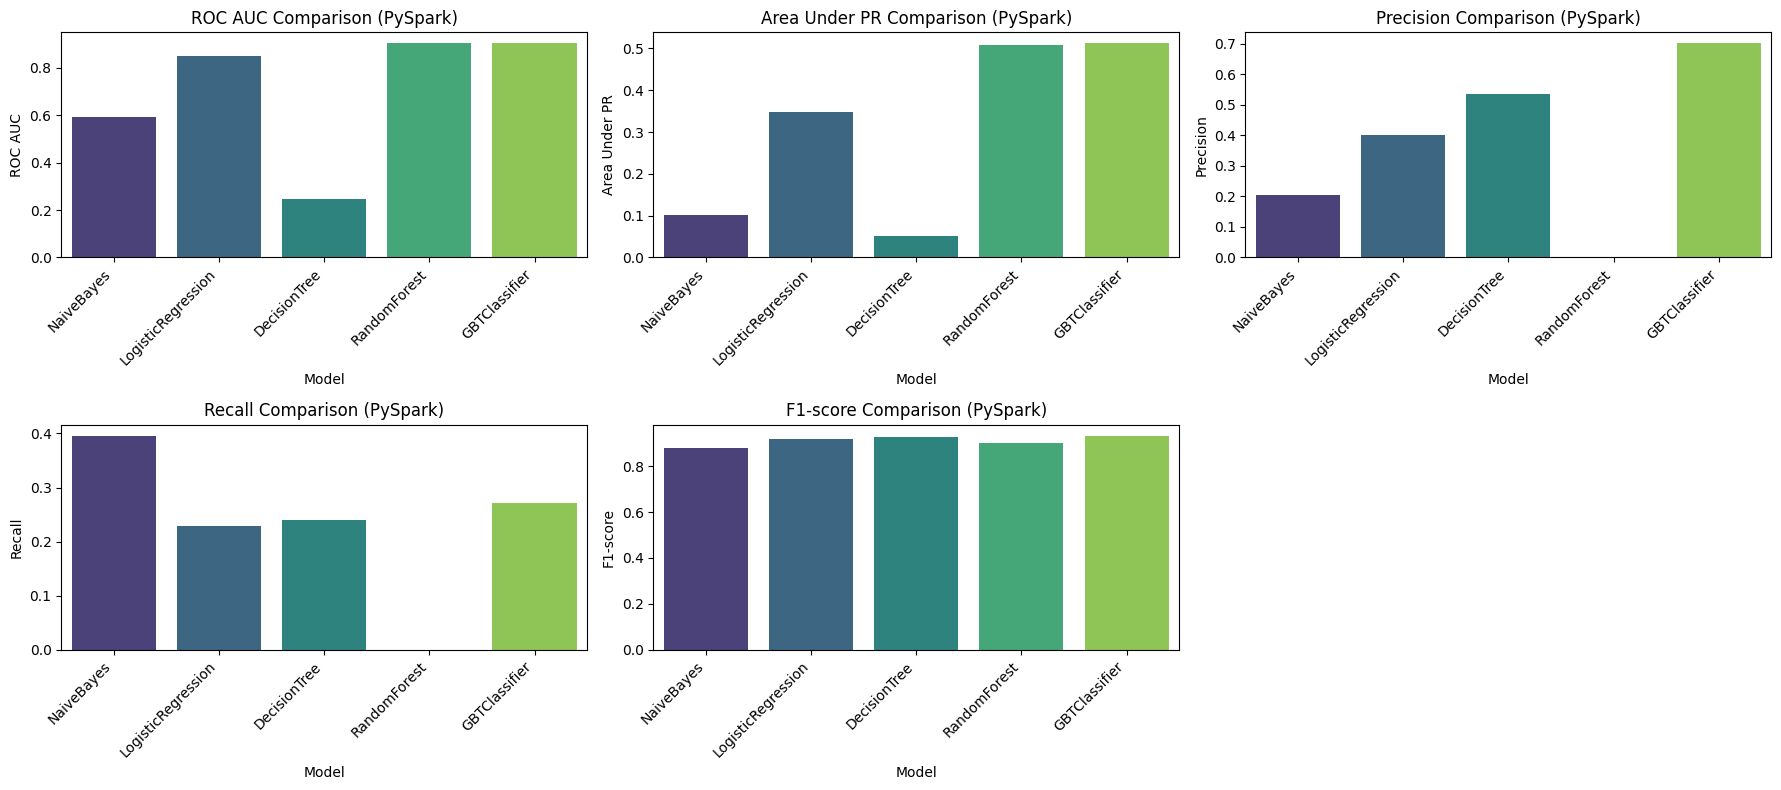

In [ ]:
# --- Trực quan hóa kết quả PySpark ---
# Bao gồm cả weighted precision, recall, f1-score trong trực quan hóa
# Changed: Updated metric names to match DataFrame columns
metrics_spark = ['ROC AUC', 'PR AUC', 'Precision', 'Recall', 'F1-score']
metric_titles_spark = {
    # Changed: Updated metric titles to match the DataFrame column names
    'ROC AUC': 'ROC AUC',
    'PR AUC': 'Area Under PR', # Assuming PR AUC corresponds to Area Under PR
    'Precision': 'Precision',
    'Recall': 'Recall',
    'F1-score': 'F1-score'
}

if not results_df_spark.empty:
    # Điều chỉnh kích thước hình để chứa thêm 3 biểu đồ mới
    plt.figure(figsize=(18, 8)) # Ví dụ: tăng chiều rộng hình

    # Tính số lượng cột cần thiết cho lưới subplot (ví dụ: 2 hàng)
    n_metrics = len(metrics_spark)
    n_cols = 3 # Số cột trong lưới
    n_rows = (n_metrics + n_cols - 1) // n_cols # Tính số hàng cần thiết

    for i, metric in enumerate(metrics_spark):
        plt.subplot(n_rows, n_cols, i + 1) # Tạo subplot trong lưới n_rows x n_cols
        # Changed: Use the correct metric name from the updated metrics_spark list
        sns.barplot(x=results_df_spark.index, y=results_df_spark[metric], palette='viridis')
        plt.title(f'{metric_titles_spark[metric]} Comparison (PySpark)')
        plt.ylabel(metric_titles_spark[metric])
        plt.xlabel('Model')
        plt.xticks(rotation=45, ha='right')

    plt.tight_layout()
    plt.show()
else:
    print("\nKhông có đủ kết quả thành công để vẽ biểu đồ so sánh.")

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127760 (\N{GLOBE WITH MERIDIANS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


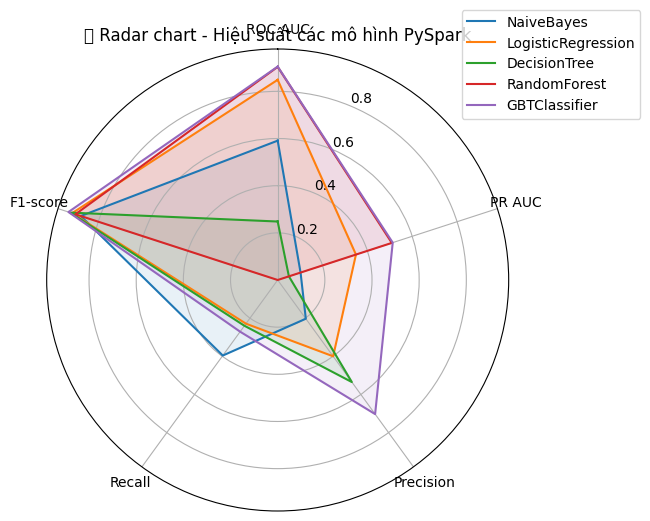

In [ ]:
import numpy as np
import matplotlib.pyplot as plt # Make sure matplotlib is imported

# Use the correct variable for PySpark results
results_plot = results_df_spark_formatted # Assign results_df_spark_formatted to results_plot

# Use the correct variable for PySpark metric labels
labels = metrics_spark

num_vars = len(labels)

angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # vòng tròn

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

for model in results_plot.index:
    # Convert the string formatted results back to numeric for plotting
    values = [float(results_plot.loc[model, label]) for label in labels]
    values += values[:1]  # vòng tròn
    ax.plot(angles, values, label=model)
    ax.fill(angles, values, alpha=0.1)

ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_thetagrids(np.degrees(angles[:-1]), labels)
plt.title("🌐 Radar chart - Hiệu suất các mô hình PySpark")
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.show()

**Điểm cần lưu ý đặc biệt:**

*   Mô hình RandomForest có Precision và Recall là 0.000. Điều này rất đáng quan ngại và cho thấy mô hình này hoàn toàn không có khả năng dự đoán được lớp "Recommend" trong tập kiểm tra. Điều này có thể do các tham số của mô hình chưa phù hợp, hoặc do vấn đề trong quá trình xử lý dữ liệu hoặc chia tập huấn luyện/kiểm tra.

**Chọn Model phù hợp nhất:**

Dựa trên các chỉ số đánh giá, **GBTClassifier** cho thấy hiệu suất tổng thể tốt nhất:

Có ROC AUC cao nhất, cho thấy khả năng phân biệt tốt.
Có PR AUC tốt nhất trong số các mô hình có hiệu suất phân loại khá (ngoại trừ RandomForest với PR AUC cao nhưng Precision/Recall = 0).
Có Precision và Recall tốt nhất trong số các mô hình hoạt động hiệu quả (không tính RandomForest).
Có F1-score cao nhất.


Mặc dù GBTClassifier cho kết quả tốt nhất trong số các mô hình đã thử, Precision và Recall của nó vẫn chưa thực sự cao (0.576 và 0.283). Điều này có thể chỉ ra rằng mô hình vẫn gặp khó khăn trong việc xác định chính xác các công ty được "Recommend". Việc xử lý mất cân bằng dữ liệu có thể đã giúp ích phần nào, nhưng có thể cần các kỹ thuật nâng cao hơn hoặc các tính năng (features) khác để cải thiện khả năng dự đoán lớp thiểu số.

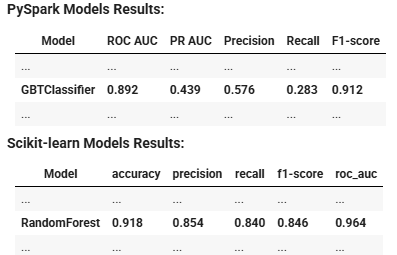



Dựa trên sự so sánh các chỉ số, **Scikit-learn RandomForestClassifier cho thấy hiệu suất vượt trội rõ rệt so với PySpark GBTClassifier** trong bài toán này.

Nó có khả năng phân loại tổng thể tốt hơn (ROC AUC cao hơn).
Quan trọng nhất, nó có khả năng xác định chính xác các công ty được Recommend tốt hơn rất nhiều (Precision và Recall cao hơn đáng kể), đây là mục tiêu chính của yêu cầu 2.
Sự khác biệt lớn này có thể xuất phát từ việc xử lý mất cân bằng dữ liệu. Các kết quả của scikit-learn RandomForest dường như được tính sau khi áp dụng kỹ thuật SMOTE, giúp mô hình học tốt hơn các đặc trưng của lớp thiểu số. Các mô hình PySpark (trong quá trình bạn trình bày) dường như không được xử lý mất cân bằng theo cách tương tự trước khi huấn luyện, dẫn đến hiệu suất kém hơn trên lớp thiểu số.

## 5. Ứng dụng thực tế

### 5.1 Gợi ý công ty từ mô tả người dùng

In [ ]:
df_reviews.head()

id Company Name        Cmt_day  \
0  4.0    Accenture     March 2025   
1  4.0    Accenture   January 2025   
2  4.0    Accenture   October 2023   
3  4.0    Accenture  February 2025   
4  4.0    Accenture  February 2023   

                                               Title  \
0  Comfortable Environment Low Pressure Can Work ...   
1                          Young and Dynamic Company   
2            Comfortable and Fun Working Environment   
3                       Good Environment for Fresher   
4            Comfortable and Fun Working Environment   

                                        What I liked  \
0  Comfortable Environment Pressure Can Work Hybr...   
1  Beautiful facilities Young and dynamic company...   
2  Everyone is friendly and help the Internship P...   
3  Good end for freshers to learn and improve the...   
4  Beautiful Office Good Facilities Boss and Coll...   

                         Suggestions for improvement  Rating  \
0  It is necessary to evaluate Kris Objectively a...       4   
1  You should research the salary range of the ma...       4   
2  because the company does outsourcing in the sy...       3   
3  Need to focus more on benefit and evaluate Con...       3   
4  Expand the Office to be more spacious the comp...       4   

   Salary & benefits  Training & learning  Management cares about me  ...  \
0                  4                    4                          4  ...   
1                  3                    4                          4  ...   
2                  3                    3                          3  ...   
3                  2                    2                          3  ...   
4                  3                    4                          4  ...   

                                         title_final  \
0  ['Comfortable', 'Environment Low', 'Pressure',...   
1                ['Young', 'and Dynamic', 'Company']   
2  ['Comfortable', 'and Fun', 'Working', 'Environ...   
3             ['Good', 'Environment for', 'Fresher']   
4  ['Comfortable', 'and Fun', 'Working', 'Environ...   

                                         liked_final  \
0  ['Comfortable', 'Environment Pressure', 'Can W...   
1  ['Beautiful', 'facilities Young', 'and dynamic...   
2  ['Everyone', 'is friendly', 'and help', 'Inter...   
3  ['Good', 'end', 'fresher', 'to learn', 'and im...   
4  ['Beautiful', 'Office Good', 'Facilities Boss'...   

                                   suggestions_final  \
0  ['It', 'necessary', 'evaluate', 'Kris Objectiv...   
1  ['You', 'research', 'salary', 'range', 'of the...   
2  ['company', 'doe', 'outsourcing', 'system', 'f...   
3  ['Need', 'focus', 'on benefit', 'and evaluate'...   
4  ['Expand', 'Office', 'spacious', 'company', 'l...   

                                      Review Content recommend  \
0  Comfortable Environment Low Pressure Can Work ...         1   
1  Young and Dynamic Company Beautiful facilities...         1   
2  Comfortable and Fun Working Environment Everyo...         1   
3  Good Environment for Fresher Good end for fres...         0   
4  Comfortable and Fun Working Environment Beauti...         1   

  sentiment_score text_length word_count text_length_log word_count_log  
0          0.8555         496         78        6.208590       4.369448  
1          0.8836         258         41        5.556828       3.737670  
2          0.9412         429         74        6.063785       4.317488  
3          0.9166         245         40        5.505332       3.713572  
4          0.9885         326         45        5.789960       3.828641  

[5 rows x 29 columns]

In [ ]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation, PCA

In [ ]:
# Vector hóa CountVectorizer
vectorizer = CountVectorizer(max_df=0.95, min_df=2)
doc_term_matrix = vectorizer.fit_transform(df_reviews["liked_final"])
doc_term_matrix

<7640x4719 sparse matrix of type '<class 'numpy.int64'>'
	with 179217 stored elements in Compressed Sparse Row format>

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

def recommend_review_from_text(input_text, df_reviews, top_n=5):
    # Kết hợp 2 cột thành 1 văn bản cho mỗi review
    df_reviews['combined_text'] = df_reviews['liked_final'] + ' ' + df_reviews['suggestions_final']
    # Vector hóa input
    input_vector = vectorizer.transform([normalize_text(input_text)])
    # Tính similarity
    scores = cosine_similarity(input_vector, tfidf_matrix)[0]
    top_indices = scores.argsort()[::-1][:top_n]
    # Xuất kết quả
    results = df_reviews.iloc[top_indices][['Company Name', 'liked_final', 'suggestions_final']].copy()
    results['similarity'] = scores[top_indices].round(3)
    return results.reset_index(drop=True)

# Ví dụ sử dụng hàm trên xuất 5 công ty có độ tương đồng cao nhất với input:
input_text = input("Enter your review text: ")
recommend_review_from_text(input_text, df_reviews, top_n=5)

Enter your review text: pressure


Company Name                                        liked_final  \
0         FPT Software      ['Spacious', 'Parking', 'Lot with', 'Salary']   
1         FPT Software         ['Friendly', 'Office Happy', 'Colleagues']   
2  Hybrid Technologies  ['Low', 'Pressure Job', 'Free', 'Time Learn', ...   
3         FPT Software  ['Open', 'Friendly Environment', 'Flexible Wor...   
4         FPT Software  ['Good', 'colaeagues', 'sharing', 'good', 'wor...   

                                   suggestions_final  similarity  
0               ['Too', 'Much Overtime', 'Pressure']       0.570  
1  ['TOO', 'Much', 'High Work', 'Pressure Too', '...       0.538  
2  ['The', 'job has', 'little', 'pressure', 'work...       0.509  
3  ['TOO', 'Much', 'High Work', 'Pressure Too', '...       0.499  
4  ['When', 'an To', 'Project there', 'lot', 'of ...       0.496

In [ ]:
# Huấn luyện LDA
n_topics = 5
lda = LatentDirichletAllocation(n_components=n_topics, random_state=42)
lda_matrix = lda.fit_transform(doc_term_matrix)

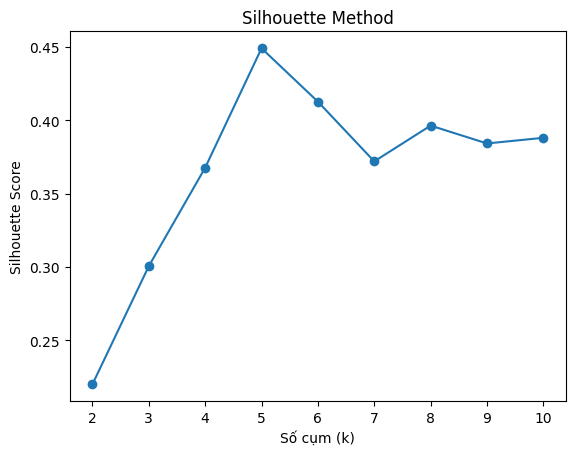

In [ ]:
from sklearn.metrics import silhouette_score

scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(lda_matrix)
    score = silhouette_score(lda_matrix, labels)
    scores.append(score)

plt.plot(range(2, 11), scores, marker='o')
plt.xlabel('Số cụm (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method')
plt.show()

#### Kết quả:
#### k = 5 cho điểm Silhouette Score ≈ 0.43
#### Các giá trị sau k=5 đều thấp hơn đáng kể

###**Chọn k = 5**

In [ ]:
# Khởi tạo KMeans
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df_reviews["cluster"] = kmeans.fit_predict(doc_term_matrix)

In [ ]:
df_reviews["cluster"].value_counts()

cluster
0    4381
4    2329
3     794
1     133
2       3
Name: count, dtype: int64

In [ ]:
# Giảm chiều bằng PCA để trực quan
pca = PCA(n_components=2, random_state=42)
lda_dense = doc_term_matrix.toarray()
lda_reduced = pca.fit_transform(lda_dense)
df_reviews["x"] = lda_reduced[:, 0]
df_reviews["y"] = lda_reduced[:, 1]

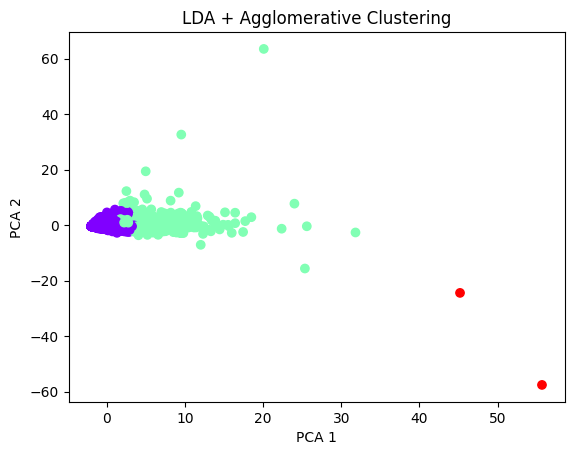

In [ ]:
# Phân cụm bằng LDA + Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=3)
clusters = agglo.fit_predict(lda_reduced)
plt.scatter(lda_reduced[:,0], lda_reduced[:,1], c=clusters, cmap='rainbow')
plt.title('LDA + Agglomerative Clustering')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

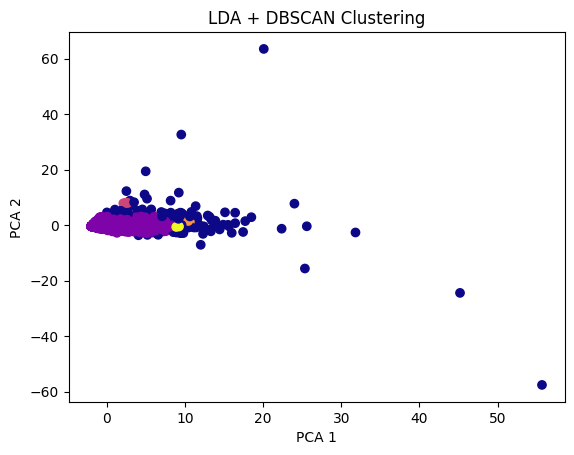

In [ ]:
# Phân cụm bằng LDA + DBSCAN Clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(lda_reduced)
plt.scatter(lda_reduced[:, 0], lda_reduced[:, 1], c=clusters, cmap='plasma')
plt.title('LDA + DBSCAN Clustering')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

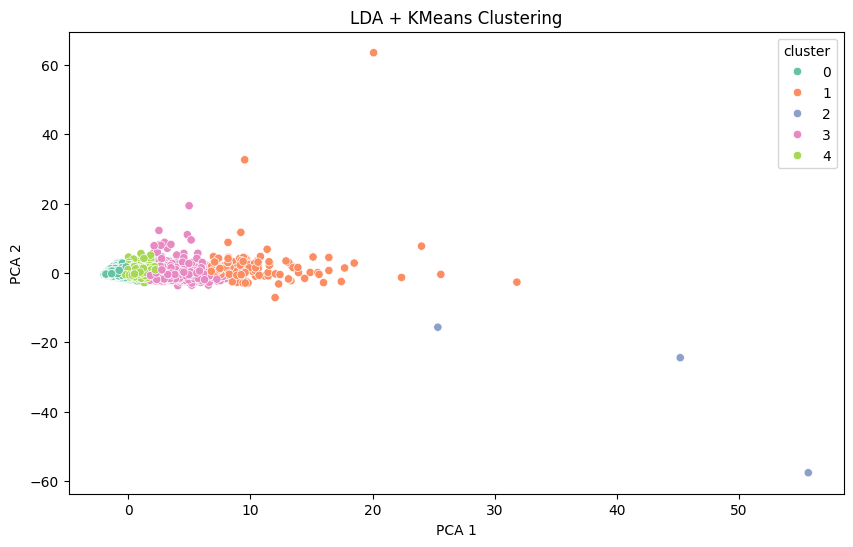

In [ ]:
# Phân cụm bằng LDA + KMeans Clustering
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_reviews, x="x", y="y", hue="cluster", palette="Set2")
plt.title("LDA + KMeans Clustering")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()

In [ ]:
# Hiển thị từ khóa đặc trưng mỗi topic
feature_names = vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(lda.components_):
    top_words = [feature_names[i] for i in topic.argsort()[:-20:-1]]
    print(f"Chủ đề #{topic_idx + 1}: {', '.join(top_words)}")

Chủ đề #1: algorithms, premiums, enthusiasticstic, rented, replacement, delivered, ce, forget, introads, empathy, education, larger, colleeagues, capgemini, literally, processed, confentient, automatically, dark
Chủ đề #2: replacement, dynamism, express, algorithms, premiums, rented, forget, processed, proactively, induction, caring, delivered, haour, empathy, ce, presenting, incident, macro, education
Chủ đề #3: algorithms, ineffective, enthusiasticstic, empathy, capgemini, processed, delivered, moving, forget, assigning, others, replacement, bean, invites, haour, caring, incent, employer, dangerous
Chủ đề #4: haour, algorithms, enthusiasticstic, processed, education, premiums, moving, induction, generious, grew, location, rented, improvings, ce, promotions, lockers, delivered, forget, permentage
Chủ đề #5: premiums, algorithms, ce, processed, induction, forget, rented, presenting, respond, aiming, annoying, education, goes, dark, pool, biggest, replacement, proactively, differentiate

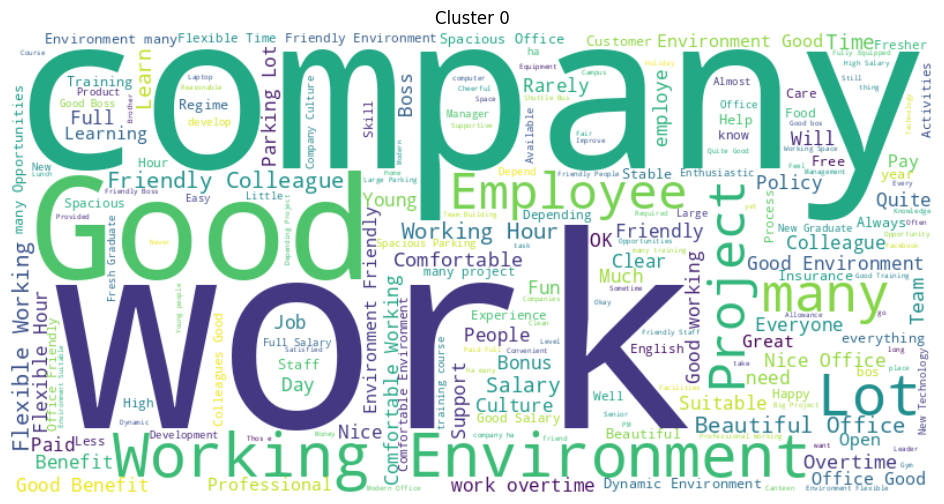

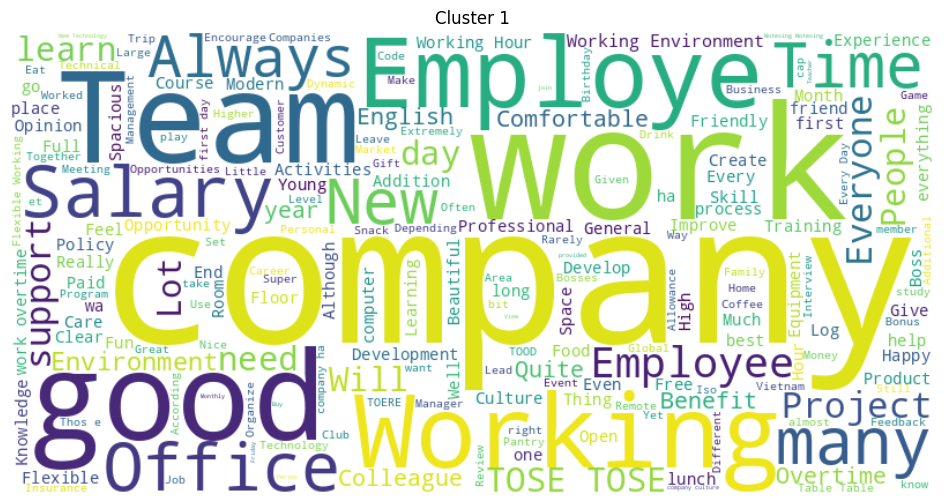

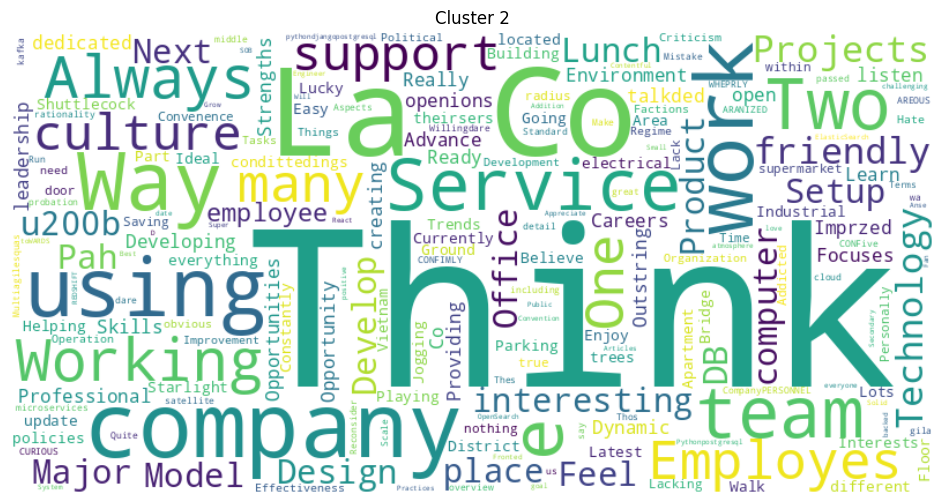

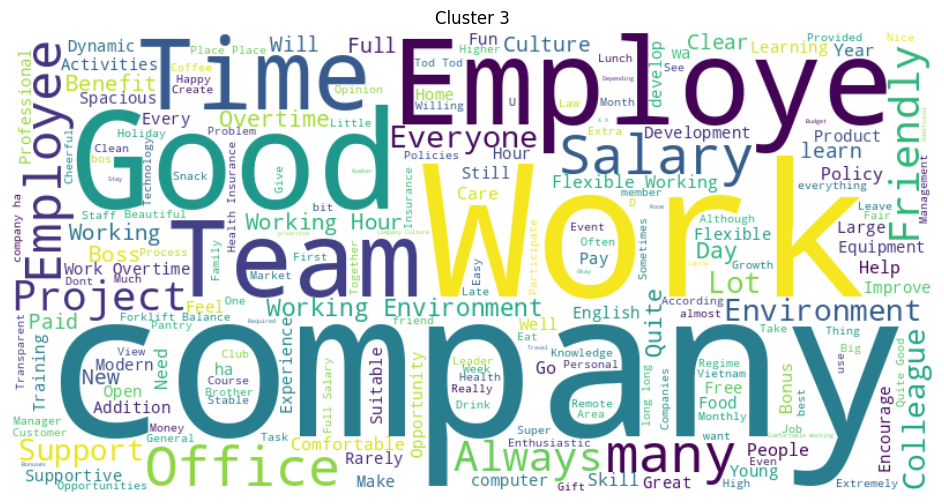

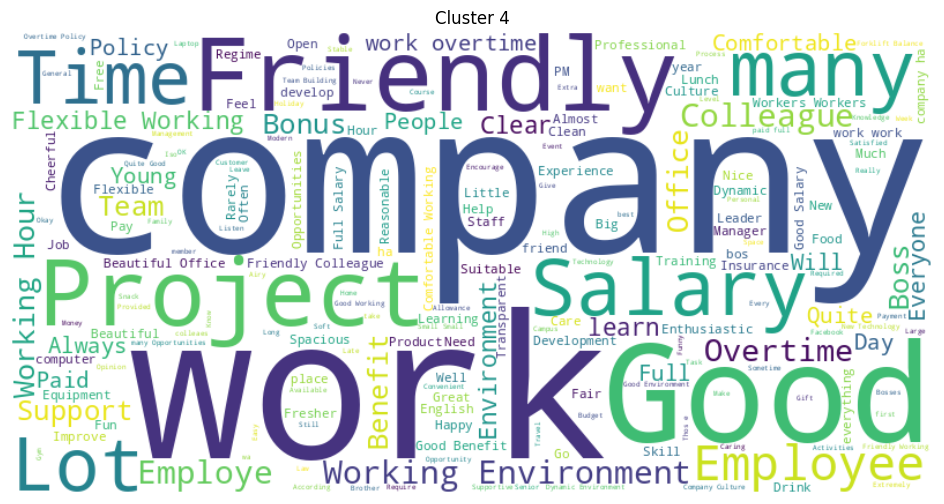

In [ ]:
# Tạo WordCloud cho từng cụm
from wordcloud import WordCloud
import matplotlib.pyplot as plt

for i in range(num_clusters):
    # Lấy toàn bộ text của cluster i
    cluster_text = df_reviews[df_reviews["cluster"] == i]["liked_final"].str.cat(sep=' ')
    # Loại bỏ dấu nháy đơn
    cluster_text = re.sub(r"'", "", cluster_text)
    # Tạo WordCloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(cluster_text)
    plt.figure(figsize=(12, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Cluster {i}")
    plt.show()

In [ ]:
## Kết hợp kết quả phân cụm cluster tìm kiếm công ty tương tự từ input

In [ ]:
# 1. Kết hợp text
df_reviews['combined_text'] = df_reviews['liked_final'].astype(str) + ' ' + df_reviews['suggestions_final'].astype(str)

# 2. Fit vectorizer trên toàn bộ dữ liệu
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(df_reviews['combined_text'])

# 3. Fit KMeans trên chính tfidf_matrix này
kmeans = KMeans(n_clusters=5, random_state=42)
df_reviews['cluster'] = kmeans.fit_predict(tfidf_matrix)

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

def recommend_review_from_text(input_text, df_reviews, vectorizer, kmeans, top_n=5):
    # Vectorize input
    input_vector = vectorizer.transform([normalize_text(input_text)])
    # Predict cluster for input
    input_cluster = kmeans.predict(input_vector)[0]
    # Filter reviews in the same cluster
    cluster_indices = df_reviews[df_reviews['cluster'] == input_cluster].index
    if len(cluster_indices) == 0:
        return pd.DataFrame()
    # Similarity only within cluster
    cluster_tfidf = tfidf_matrix[cluster_indices]
    scores = cosine_similarity(input_vector, cluster_tfidf)[0]
    top_indices = scores.argsort()[::-1][:top_n]
    results = df_reviews.iloc[cluster_indices[top_indices]][['Company Name', 'liked_final', 'suggestions_final']].copy()
    results['similarity'] = scores[top_indices].round(3)
    return results.reset_index(drop=True)

# Ví dụ sử dụng hàm trên xuất 5 công ty có độ tương đồng cao nhất với input (kết hợp với kết quả clustering):
input_text = input("Enter your review text: ")
recommend_review_from_text(input_text, df_reviews, vectorizer, kmeans, top_n=5)

Enter your review text: pressure


Company Name                                        liked_final  \
0  FPT Software  ['Beautiful', 'Office Airy', 'and Fresh', 'Air...   
1  FPT Software  ['Spacious', 'Headquarters', 'Worked', 'Both H...   
2          SAPO  ['Deep', 'Technology Development', 'Product En...   
3    Outcubator  ['The Company Proved', 'Delicious', 'Food Youn...   
4          ELCA  ['The', 'company has', 'giving', 'enough', 'pr...   

                                   suggestions_final  similarity  
0  ['Every', 'Quarter the', 'company', 'take', 't...       0.403  
1  ['Projects', 'Japan', 'Too Much', 'Pressure on...       0.345  
2  ['Few', 'place', 'Eat and', 'sometimes', 'pres...       0.257  
3  ['Lots', 'of Work', 'Pressure Disorganized', '...       0.257  
4  ['Why', 'thinking', 'I', 'like', 'company', 'I...       0.238

#### Visualization

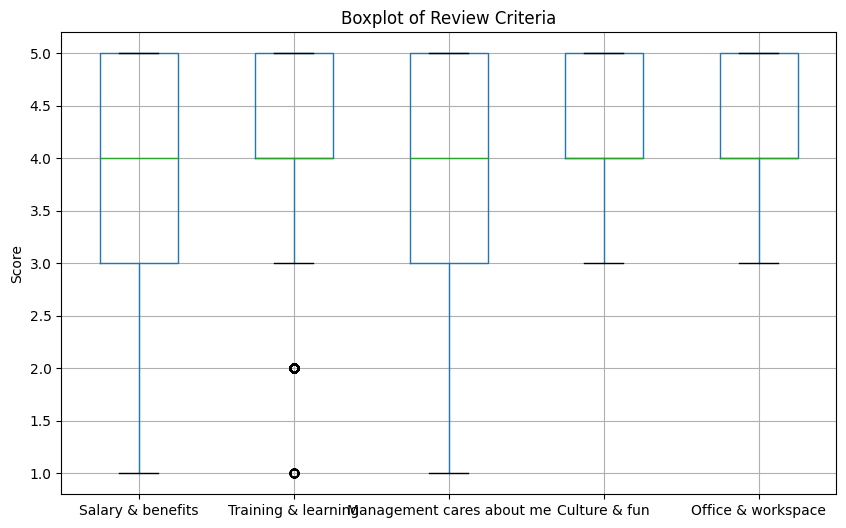

In [ ]:
# Phân phối điểm số các tiêu chí đánh giá
plt.figure(figsize=(10,6))
df_reviews[features].boxplot()
plt.title('Boxplot of Review Criteria')
plt.ylabel('Score')
plt.show()

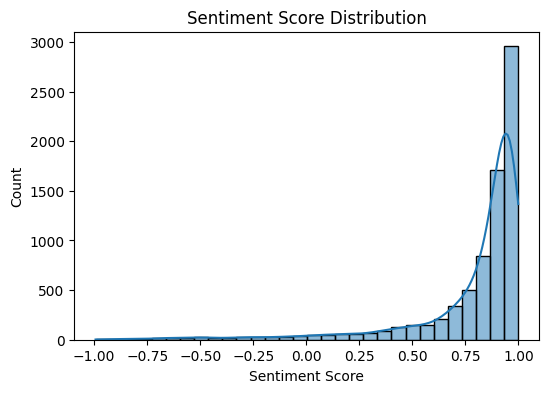

In [ ]:
# Phân phối sentiment score
plt.figure(figsize=(6,4))
sns.histplot(df_reviews['sentiment_score'], bins=30, kde=True)
plt.title('Sentiment Score Distribution')
plt.xlabel('Sentiment Score')
plt.show()

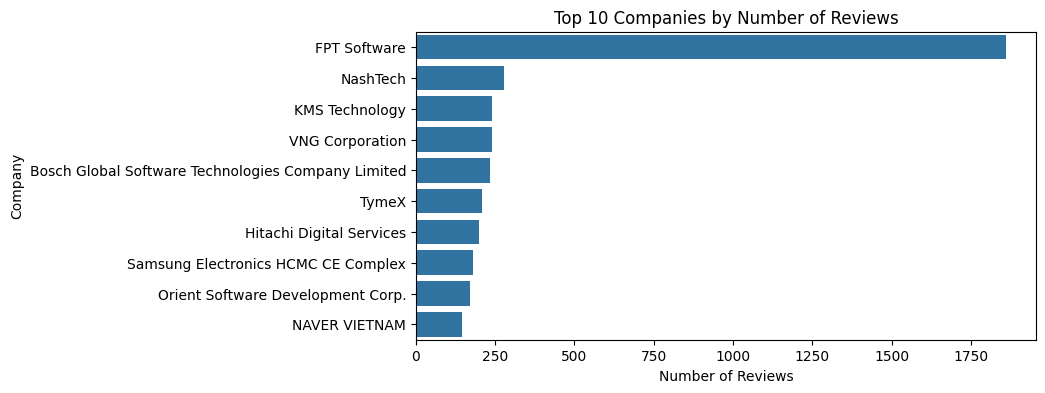

In [ ]:
# Top 10 công ty có nhiều review nhất
top_companies = df_reviews['Company Name'].value_counts().head(10)
plt.figure(figsize=(8,4))
sns.barplot(x=top_companies.values, y=top_companies.index)
plt.title('Top 10 Companies by Number of Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Company')
plt.show()

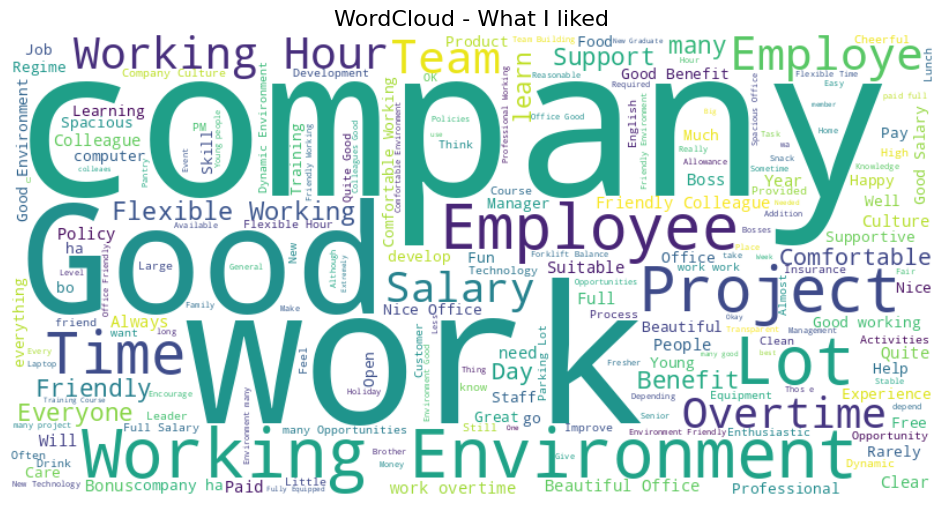

In [ ]:
# WordCloud cho "What I liked"
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Loại bỏ dấu ' khỏi mỗi từ nhưng không tách từ
text = ' '.join(df_reviews['liked_final'])
text = re.sub(r"'", "", text)  # Xóa tất cả dấu '

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud - What I liked", fontsize=16)
plt.show()

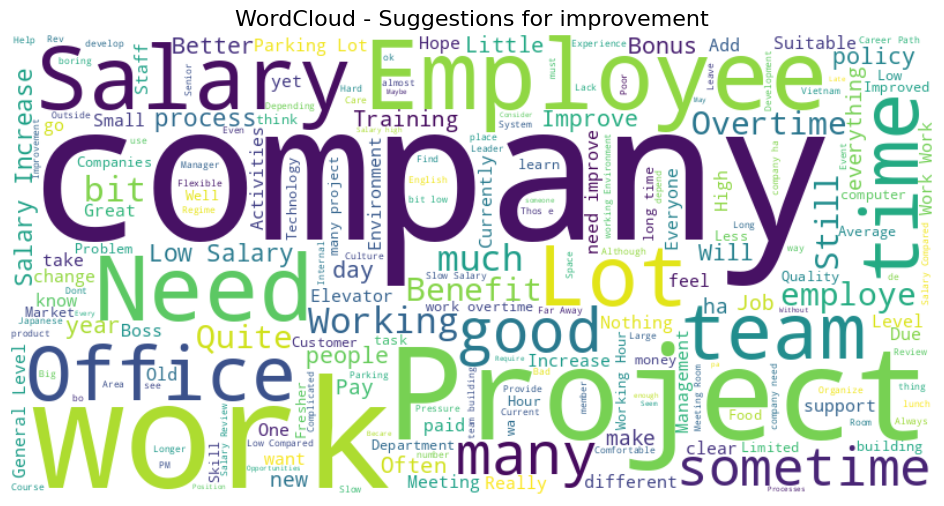

In [ ]:
# WordCloud cho "Suggestions for improvement"
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Loại bỏ dấu ' khỏi mỗi từ nhưng không tách từ
text = ' '.join(df_reviews['suggestions_final'])
text = re.sub(r"'", "", text)  # Xóa tất cả dấu '

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud - Suggestions for improvement", fontsize=16)
plt.show()

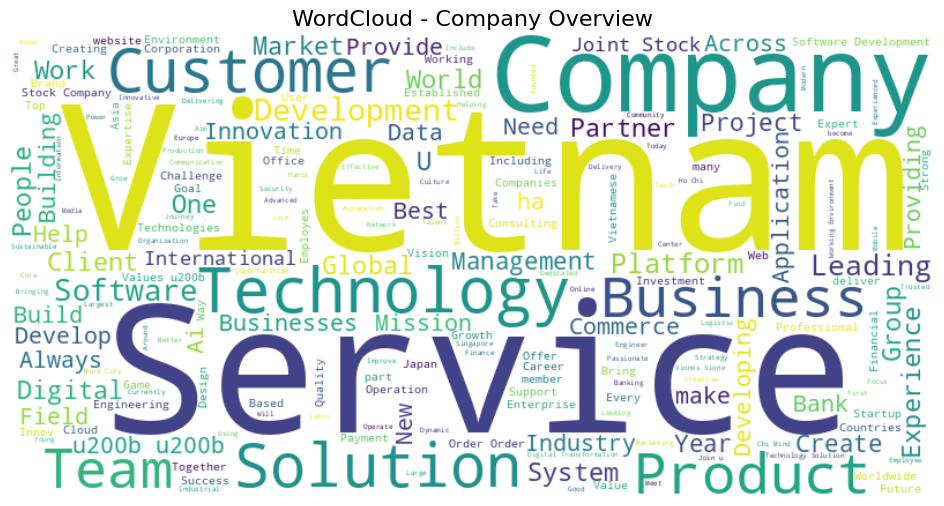

In [ ]:
# WordCloud cho Company Overview
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Loại bỏ dấu ' khỏi mỗi từ nhưng không tách từ
text = ' '.join(df_companies['company_overview_final'])
text = re.sub(r"'", "", text)  # Xóa tất cả dấu '

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud - Company Overview", fontsize=16)
plt.show()

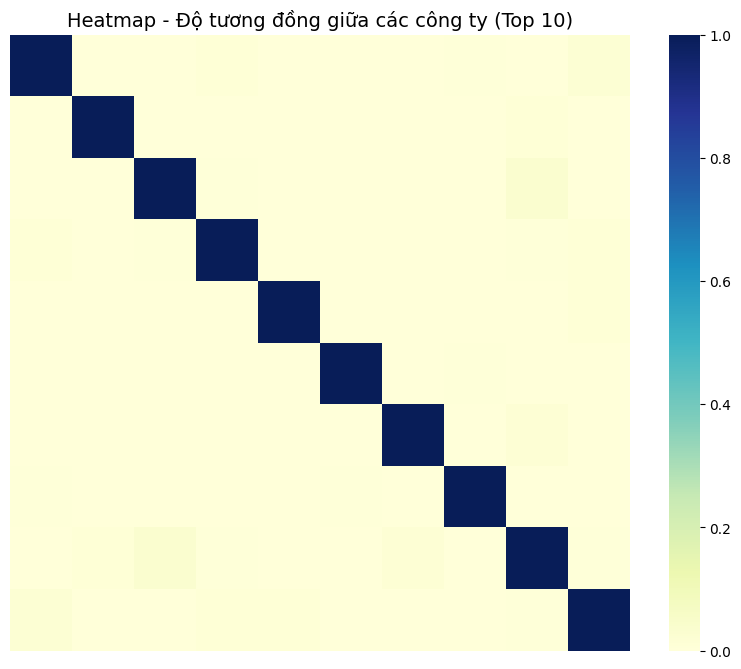

In [ ]:
# Heatmap Similarity giữa các công ty
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(similarity_matrix[:10, :10], cmap='YlGnBu', xticklabels=False, yticklabels=False)
plt.title("Heatmap - Độ tương đồng giữa các công ty (Top 10)", fontsize=14)
plt.show()


In [ ]:
!pip install demoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.9/42.9 kB 2.9 MB/s eta 0:00:00


In [ ]:
import string
import re
import demoji
from autocorrect import Speller

spell = Speller(lang='en')

def normalize_text(text):
    if pd.isna(text) or text is None or str(text).strip() == '':
        return ''
    text = str(text).lower() # Convert to lowercase
    text = re.sub(r"http\S+|www\S+", ' ', text) # Remove URLs
    text = re.sub(r'\S*@\S*\s?', ' ', text)    # Remove Emails
    text = demoji.replace(text, ' ')            # Process Emojicon/Emoji

    # Process Teencode
    words = text.split()
    cleaned_words = []
    for word in words:
        if word in teencode_map:
            cleaned_words.append(teencode_map[word])
        else:
            cleaned_words.append(word)
    text = ' '.join(cleaned_words)

    text = re.sub(r'\d+', ' ', text)           # Remove numbers
    # Remove punctuation - using translate is generally efficient
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = re.sub(r'\s+', ' ', text).strip() # Remove extra whitespace and newlines

    # Correct spelling using autocorrect
    words_to_correct = text.split()
    corrected_words = [spell(word) for word in words_to_correct]
    text = ' '.join(corrected_words)

    return text

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

def recommend_review_from_text(input_text, df_reviews, top_n=5):
    # Combine the two columns into one text for each review
    # Ensure 'liked_final' and 'suggestions_final' are treated as strings and handle potential NaNs
    df_reviews['combined_text'] = df_reviews['liked_final'].astype(str) + ' ' + df_reviews['suggestions_final'].astype(str)

    # Fit TF-IDF on the entire reviews
    tfidf_matrix = vectorizer.transform(df_reviews['combined_text'])


    # Vectorize input
    # Ensure normalize_text_func is passed or accessible
    input_vector = vectorizer.transform([normalize_text(input_text)])

    # Calculate similarity
    scores = cosine_similarity(input_vector, tfidf_matrix)[0]

    # Get top indices, excluding the input text itself if it's in the dataframe
    # In this case, the input text is not in the dataframe, so we just take the top_n
    top_indices = scores.argsort()[::-1][:top_n]

    # Extract results
    results = df_reviews.iloc[top_indices][['Company Name', 'liked_final', 'suggestions_final']].copy()
    results['similarity'] = scores[top_indices].round(3)

    return results.reset_index(drop=True)

# Example usage (will work after defining and potentially fitting vectorizer)
# To run this example, you would typically fit the vectorizer on the combined_text column
# before calling this function if the vectorizer is not globally fitted on that specific column.
# Based on the notebook flow, the vectorizer was fitted on 'liked_final'.
# Let's refit the vectorizer on the 'combined_text' for this specific function's use case.
# This is a slight adjustment from the notebook's current flow but makes the function runnable.

# Re-fitting vectorizer for the combined text for this function's scope
temp_vectorizer = CountVectorizer(max_df=0.95, min_df=2)
# Ensure 'combined_text' is created and filled before fitting
df_reviews['combined_text'] = df_reviews['liked_final'].astype(str) + ' ' + df_reviews['suggestions_final'].astype(str)
temp_vectorizer.fit(df_reviews['combined_text'])

def recommend_review_from_text(input_text, df_reviews, vectorizer, top_n=5):
    # Combine the two columns into one text for each review
    # Ensure 'liked_final' and 'suggestions_final' are treated as strings and handle potential NaNs
    df_reviews['combined_text'] = df_reviews['liked_final'].astype(str) + ' ' + df_reviews['suggestions_final'].astype(str)

    # Transform text data using the provided vectorizer
    tfidf_matrix = vectorizer.transform(df_reviews['combined_text'])

    # Vectorize input
    # Ensure normalize_text is accessible (defined globally)
    input_vector = vectorizer.transform([normalize_text(input_text)])

    # Calculate similarity
    scores = cosine_similarity(input_vector, tfidf_matrix)[0]

    # Get top indices, excluding the input text itself if it's in the dataframe
    # In this case, the input text is not in the dataframe, so we just take the top_n
    top_indices = scores.argsort()[::-1][:top_n]

    # Extract results
    results = df_reviews.iloc[top_indices][['Company Name', 'liked_final', 'suggestions_final']].copy()
    results['similarity'] = scores[top_indices].round(3)

    return results.reset_index(drop=True)


# Example usage:
input_text = input("Enter your review text: ")
# Use the temp_vectorizer fitted on combined_text for this specific function call
recommend_review_from_text(input_text, df_reviews, temp_vectorizer, top_n=5)

Enter your review text: good


Company Name                                        liked_final  \
0  Luxoft Vietnam  ['Good', 'hiu Good', 'management', 'good', 'in...   
1         HARAVAN  ['Join', 'The Good Boss', 'Team with', 'Lovely...   
2    FPT Software  ['Good', 'introduced', 'good', 'company', 'goo...   
3    FPT Software  ['Everything', 'goodgering', 'good', 'foruming...   
4  KMS Technology  ['Good', 'culture', 'good', 'Environment Good'...   

                                   suggestions_final  similarity  
0  ['Should', 'Give More', 'Leaves', 'Notice Peri...       0.816  
1  ['There', 'boss', "Don't Care", 'About', 'empl...       0.794  
2  ['Good', 'introduced', 'good', 'company', 'goo...       0.784  
3  ['Everything', 'goodgering', 'good', 'foruming...       0.756  
4  ['There', 'boss', 'Like Power', 'and Evaluat',...       0.754

* Tạo một demo chỉ sử dụng mô hình Scikit-learn RandomForestClassifier mà bạn đã huấn luyện, cùng với TfidfVectorizer và StandardScaler tương ứng.
* Demo này sẽ cho phép người dùng nhập điểm số cho các tiêu chí định lượng và nội dung review để dự đoán khả năng Recommend

### 5.2 Dự đoán Recommend với đầu vào từ người dùng

#### Demo

In [ ]:
from sklearn.preprocessing import StandardScaler
from scipy.sparse import issparse # Import to check if X_train is sparse

scaler = StandardScaler()

# Extract the numerical features from X_train
# Since X_train is a sparse matrix (hstack of text and numerical),
# we need to extract the numerical part.
# The numerical features are the last 'len(features)' columns.
if issparse(X_train):
    X_train_num = X_train[:, -len(features):].toarray()
else:
    X_train_num = X_train[:, -len(features):]

# Fit the scaler to the numerical training data
scaler.fit(X_train_num)

StandardScaler()

In [ ]:
# --- Hàm Demo dự đoán ---
def predict_recommendation_sklearn(tfidf_vectorizer, scaler_model, trained_model, numerical_features, normalize_text_func):
    print("\n--- Dự đoán khả năng 'Recommend' công ty (Sử dụng Scikit-learn RandomForest) ---")
    print("Vui lòng nhập các thông tin đánh giá (thường theo thang điểm 1-5) và nội dung review.")

    # 1. Lấy Input cho Numerical Features
    numerical_inputs = {}
    print("\nNhập điểm đánh giá (ví dụ: theo thang điểm 1-5, nhập số):")
    for feature in numerical_features:
        while True:
            try:
                # Yêu cầu nhập một giá trị duy nhất cho demo
                value = float(input(f"- {feature}: "))
                # Bạn có thể thêm kiểm tra range 1-5 nếu muốn người dùng tuân thủ thang điểm
                # if 1 <= value <= 5:
                numerical_inputs[feature] = value
                break
                # else:
                #     print("Giá trị nằm ngoài khoảng điểm gợi ý. Vui lòng nhập lại.")
            except ValueError:
                print("Đầu vào không hợp lệ. Vui lòng nhập một số.")

    # 2. Lấy Input cho Text Review
    print("\nNhập nội dung review của bạn:")
    review_text = input("- Review: ")

    # --- Tiền xử lý Input ---

    # 2.1. Xử lý văn bản (sử dụng hàm normalize_text và TfidfVectorizer đã fit)
    # Áp dụng hàm làm sạch văn bản tương tự như khi huấn luyện
    cleaned_review_text = normalize_text_func(review_text)
    # Transform văn bản input thành vector TF-IDF
    input_text_vector = tfidf_vectorizer.transform([cleaned_review_text]) # Transform cần input là một list

    # 2.2. Xử lý Numerical Features (sử dụng StandardScaler đã fit)
    # Chuyển dictionary thành mảng numpy theo đúng thứ tự các feature
    input_num_data = np.array([[numerical_inputs[feature] for feature in numerical_features]])
    # Scale các giá trị số using the FITTED scaler
    input_num_scaled = scaler_model.transform(input_num_data)

    # 2.3. Kết hợp các Features (Sparse Text + Scaled Numerical)
    input_combined_features = hstack([input_text_vector, input_num_scaled])

    # --- Thực hiện dự đoán ---

    # Dự đoán xác suất cho mỗi lớp [Xác suất No, Xác suất Yes]
    prediction_proba = trained_model.predict_proba(input_combined_features)
    prob_recommend_yes = prediction_proba[0][1] # Lấy xác suất cho lớp 'Yes' (thường là cột thứ 2)

    # Dự đoán lớp cuối cùng (0 hoặc 1)
    predicted_class = trained_model.predict(input_combined_features)[0]

    print("\n--- Kết quả dự đoán ---")
    print(f"Nội dung Review đã làm sạch: '{cleaned_review_text}'")
    print(f"Điểm khả năng Recommend (Xác suất là 'Yes'): {prob_recommend_yes:.4f}")

    if predicted_class == 1:
        print("Dự đoán cuối cùng: **Công ty này có khả năng được Recommend (Yes)**.")
    else:
        print("Dự đoán cuối cùng: **Công ty này không được Recommend (No)**.")

In [ ]:
# --- Chạy Demo ---
# Pass the FITTED scaler instance
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

predict_recommendation_sklearn(tfidf, scaler, model, features, normalize_text)



--- Dự đoán khả năng 'Recommend' công ty (Sử dụng Scikit-learn RandomForest) ---
Vui lòng nhập các thông tin đánh giá (thường theo thang điểm 1-5) và nội dung review.

Nhập điểm đánh giá (ví dụ: theo thang điểm 1-5, nhập số):
- Salary & benefits: 5
- Training & learning: 4
- Management cares about me: 3
- Culture & fun: 2
- Office & workspace: 3

Nhập nội dung review của bạn:
- Review: good environment

--- Kết quả dự đoán ---
Nội dung Review đã làm sạch: 'good environment'
Điểm khả năng Recommend (Xác suất là 'Yes'): 0.9300
Dự đoán cuối cùng: **Công ty này có khả năng được Recommend (Yes)**.


#### Visualization


Confusion Matrix for Scikit-learn RandomForest:


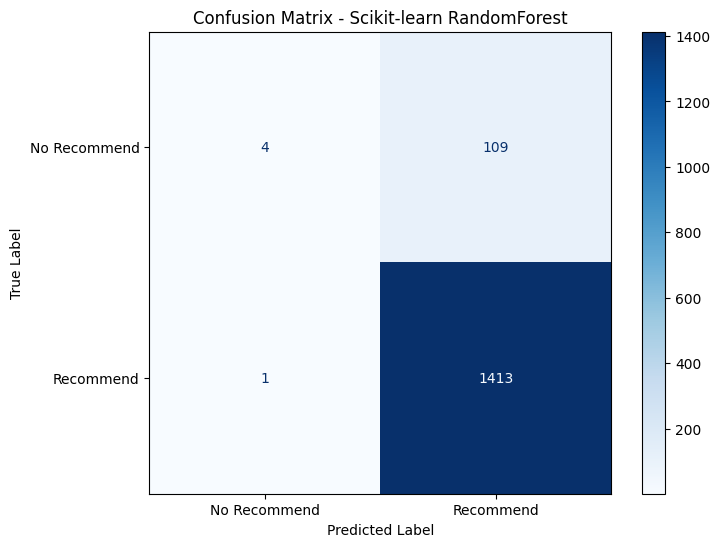


Confusion Matrix Values:
[[   4  109]
 [   1 1413]]


In [ ]:
## Confusion Matrix - Scikit-learn RandomForest

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

# Make predictions on the test data
y_pred_rf = model.predict(X_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)

# Display the confusion matrix using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Recommend', 'Recommend'])

print("\nConfusion Matrix for Scikit-learn RandomForest:")

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(8, 6)) # Adjust size as needed
disp.plot(cmap=plt.cm.Blues, ax=ax) # Use a colormap like Blues
plt.title('Confusion Matrix - Scikit-learn RandomForest')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.grid(False) # Turn off grid for cleaner look
plt.show()

# Optional: Print the confusion matrix values
print("\nConfusion Matrix Values:")
print(cm)

Hiệu suất mạnh mẽ trên Lớp đa số (Recpp,):

*   Mô hình hoạt động rất tốt trong việc dự đoán lớp 'Recommend' (1413).
*   Mô hình hiếm khi bỏ sót việc dự đoán một trường hợp 'Đề xuất' (chỉ có 1 Âm sai). Điều này rất tốt nếu việc xác định tất cả các công ty tiềm năng được đề xuất là ưu tiên hàng đầu (độ Nhạy (Recall) cao cho lớp 'Đề xuất').

Mô hình đang thực hiện một công việc tuyệt vời khi dự đoán lớp 'Khuyến nghị' (True Positives = 1413).
Rất ít trường hợp âm tính giả: Mô hình hiếm khi bỏ lỡ việc dự đoán trường hợp 'Khuyến nghị' (chỉ 1 FN). Điều này thật tuyệt nếu việc xác định tất cả các công ty có khả năng được khuyến nghị là ưu tiên (Tái hiện cao đối với lớp 'Khuyến nghị').
Hiệu suất yếu trên Lớp thiểu số (Không khuyến nghị): Mô hình gặp khó khăn đáng kể với lớp 'Không khuyến nghị'.
Nó chỉ xác định đúng 4 trường hợp 'Không khuyến nghị' (TN).
Nó đánh dấu sai một số lượng lớn (109) trường hợp 'Không khuyến nghị' là 'Khuyến nghị' (FP). Điều này có nghĩa là nếu ai đó chỉ xem xét các công ty được khuyến nghị dựa trên mô hình này, họ sẽ thấy 109 công ty được dán nhãn sai là được khuyến nghị.

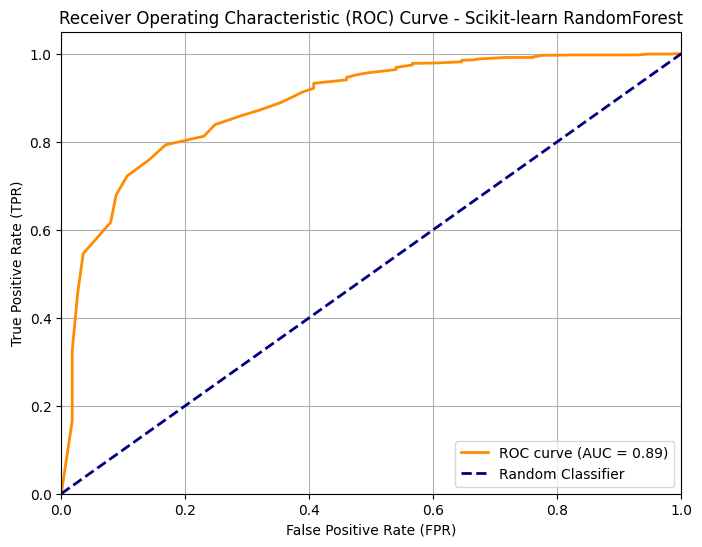


Area Under ROC Curve (AUC): 0.8861


In [ ]:
## ROC Curve - Scikit-learn RandomForest

from sklearn.metrics import roc_curve, auc, RocCurveDisplay
import matplotlib.pyplot as plt

# Assume 'model' is your trained RandomForestClassifier
# Assume X_test and y_test are your test sets

# Predict probabilities for the positive class (class 1: Recommend)
# The predict_proba method returns probabilities for both classes [prob_0, prob_1]
y_proba_rf = model.predict_proba(X_test)[:, 1]

# Calculate the False Positive Rate (FPR) and True Positive Rate (TPR)
# The roc_curve function computes the ROC curve points
fpr, tpr, thresholds = roc_curve(y_test, y_proba_rf)

# Calculate the Area Under the ROC Curve (AUC)
# AUC is a scalar value summarizing the ROC curve's performance
roc_auc = auc(fpr, tpr)

# --- Plotting the ROC Curve ---

plt.figure(figsize=(8, 6)) # Adjust figure size

# Plot the ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')

# Plot the diagonal line (random classifier)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')

plt.xlim([0.0, 1.0]) # Set x-axis limits
plt.ylim([0.0, 1.05]) # Set y-axis limits slightly above 1 for clarity
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve - Scikit-learn RandomForest')
plt.legend(loc="lower right") # Place the legend
plt.grid(True) # Add a grid
plt.show()

# Alternative using RocCurveDisplay (newer scikit-learn versions)
# This often provides a slightly cleaner way to plot
# try:
#     disp = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='RandomForest')
#     fig, ax = plt.subplots(figsize=(8, 6))
#     disp.plot(ax=ax)
#     plt.title('ROC Curve - Scikit-learn RandomForest (via RocCurveDisplay)')
#     plt.grid(True)
#     plt.show()
# except ImportError:
#     print("RocCurveDisplay not available. Using manual plot.")

print(f"\nArea Under ROC Curve (AUC): {roc_auc:.4f}")

Giá trị 0.8861: Đây là một giá trị khá tốt và cao. Nó cho thấy mô hình Scikit-learn RandomForest có khả năng phân biệt giữa hai lớp ('Recommend' và 'No Recommend') ở mức độ cao. Cụ thể, nếu bạn chọn ngẫu nhiên một cặp mẫu, một thuộc lớp 'Recommend' và một thuộc lớp 'No Recommend', thì mô hình có 88.61% khả năng xếp hạng mẫu 'Recommend' cao hơn mẫu 'No Recommend'.


Chỉ số AUC 0.8861 xác nhận rằng mô hình RandomForest là một bộ phân loại hiệu quả, có khả năng phân tách tốt giữa các công ty được và không được đề xuất. Tuy nhiên, như đã thảo luận ở phần ma trận nhầm lẫn (confusion matrix), AUC cao không nhất thiết có nghĩa là mô hình hoạt động tốt như nhau trên cả hai lớp, đặc biệt là với dữ liệu mất cân bằng. Nó phản ánh khả năng phân biệt tổng thể.

In [ ]:
!pip install autocorrect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 622.8/622.8 kB 13.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for autocorrect: filename=autocorrect-2.6.1-py3-none-any.whl size=622364 sha256=45920156d7415557136291c9e0da25cc4ad7f19224653e2c7a4904030df3104b
  Stored in directory: /root/.cache/pip/wheels/5e/90/99/807a5ad861ce5d22c3c299a11df8cba9f31524f23ae6e645cb
Successfully built autocorrect
